# Agricultural Product Distribution Forecasting: Predicting Demand to Optimize Harvest Schedules

### 1. Project Overview

#### 1.1 Rationale for the Project

- Enhancing Efficiency: Maximize resource utilization with accurate demand forecasting and optimized harvest schedules.
    
- Reducing Food Waste: Align harvest times with demand predictions to minimize waste.
    
- Improved Profit Margins: Enhance profit margins through efficient distribution, reduced wastage, and meeting customer demand.
    
- Competitive Advantage: Stay ahead of market trends and consistently deliver fresh produce.

#### 1.2 Aim of the Project
- Develop a robust demand forecasting model to predict product demand based on historical data, weather conditions, and market trends.
    
- Identify key parameters that affect production demand.

### 2. Business Overview/Problem

GreenSeason Farms faces several challenges:

- Inefficient Harvesting: Underutilization of      resources due to reliance on traditional        seasonal patterns.
    
- Demand Variability: Difficulty in         predicting    demand fluctuations, leading to  overstocking or understocking.
    
- Shelf Life Management: Ensuring products reach customers at peak freshness.
    
- Transportation Optimization: Finding optimal routes and delivery schedules to minimize transportation costs.

### 2.1 Tech Stack

- Pandas

- NumPy

- SciPy

- Matplotlib

- Seaborn

- Statsmodels

- Prophet

- ARIMA

- Scikit-learn

### 2.2 Project Scope

- Data Collection & Preparation

- Exploratory Data Analysis

- Model Evaluation

- Demand Forecasting Mode

### 3. Data Collection and Preparation

### Import Packages

In [87]:
#pip install prophet

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')



Data Collection

In [45]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\Amdari\Agricultural Product\Dataset.csv')

In [46]:
df.head()

Date       Product  Quantity_Sold      Revenue  Temperature_Celsius  \
0  2015-01-01  Strawberries          690.0    70.298339             9.680289   
1  2015-01-01        Apples          354.0   599.863944             9.680289   
2  2015-01-01      Tomatoes          275.0   199.249505             9.680289   
3  2015-01-01        Apples         1079.0  1136.111770             9.680289   
4  2015-01-01  Strawberries         1008.0   111.653303             9.680289   

   Rainfall_mm Location  Transportation_Cost  Labor_Cost    Customer  \
0     0.077279  Field C                   20   13.771809  Customer B   
1     0.077279  Field A                   50    9.702670  Customer C   
2     0.077279  Field C                   20   22.356498  Customer C   
3     0.077279  Field A                   50   15.691418  Customer A   
4     0.077279  Field B                   30   17.473353  Customer B   

   Quality_Score  Inventory_Level  
0       0.769340           3608.0  
1       0.861953           3982.0  
2       0.861953           3708.0  
3       0.876056           3455.0  
4       0.769340           1504.0

In [47]:
df.describe()

Quantity_Sold       Revenue  Temperature_Celsius   Rainfall_mm  \
count   28382.000000  28388.000000         28377.000000  28377.000000   
mean      609.197097    405.584444            20.024600      7.393332   
std       316.521726    485.206130             8.701719      4.316396   
min        41.000000      3.546003             5.011709      0.003963   
25%       334.000000     94.572138            12.435564      3.621238   
50%       607.500000    256.513966            20.124216      7.358936   
75%       884.000000    513.624224            27.544882     11.062843   
max      1195.000000   3382.034941            34.985404     14.997572   

       Transportation_Cost    Labor_Cost  Quality_Score  Inventory_Level  
count         28388.000000  28388.000000   28388.000000     28382.000000  
mean             33.465901     17.573430       0.835909      2617.164012  
std              12.466448      7.232465       0.047362      1189.840946  
min              20.000000      5.000083       0.769340        66.000000  
25%              20.000000     11.289710       0.769340      1621.000000  
50%              30.000000     17.586134       0.861953      2630.000000  
75%              50.000000     23.869033       0.876056      3597.000000  
max              50.000000     29.998989       0.876056      5172.000000

In [48]:
missing_values = df.isnull().sum()

missing_values

Date                    0
Product                 0
Quantity_Sold           6
Revenue                 0
Temperature_Celsius    11
Rainfall_mm            11
Location                0
Transportation_Cost     0
Labor_Cost              0
Customer                0
Quality_Score           0
Inventory_Level         6
dtype: int64

Check for Outliers

In [49]:
cols = ('Quantity_Sold', 'Temperature_Celsius', 'Rainfall_mm', 'Inventory_Level')

for col in cols:
    z = np.abs(stats.zscore(df[col], nan_policy='omit'))
    outliers = df[col][z>3]
    print(f'{col} has {len(outliers)} outliers')

Quantity_Sold has 0 outliers
Temperature_Celsius has 0 outliers
Rainfall_mm has 0 outliers
Inventory_Level has 0 outliers


CHeck For Skewness

In [50]:
for col in cols:
    skew = df[col].skew()
    print(f'{col} has a skewness of {skew}')

Quantity_Sold has a skewness of 0.007049968334628765
Temperature_Celsius has a skewness of -0.005244633606917498
Rainfall_mm has a skewness of 0.017580193058957767
Inventory_Level has a skewness of -0.006928239182168006


Handle Missing Values

In [51]:
for col in cols:
    df[col].fillna(df[col].mean(), inplace = True)

Confirm that there are no more missing numbers

In [52]:
missing_values = df.isnull().sum()

missing_values

Date                   0
Product                0
Quantity_Sold          0
Revenue                0
Temperature_Celsius    0
Rainfall_mm            0
Location               0
Transportation_Cost    0
Labor_Cost             0
Customer               0
Quality_Score          0
Inventory_Level        0
dtype: int64

### 4. Exploratory Data Analysis (EDA)

### Univariate Analysis

Analysing the distribution of variables individually, for 

- numerical variables,
- categorical Variables

##### Univariate Analysis: Numerical Variables

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28388 entries, 0 to 28387
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 28388 non-null  object 
 1   Product              28388 non-null  object 
 2   Quantity_Sold        28388 non-null  float64
 3   Revenue              28388 non-null  float64
 4   Temperature_Celsius  28388 non-null  float64
 5   Rainfall_mm          28388 non-null  float64
 6   Location             28388 non-null  object 
 7   Transportation_Cost  28388 non-null  int64  
 8   Labor_Cost           28388 non-null  float64
 9   Customer             28388 non-null  object 
 10  Quality_Score        28388 non-null  float64
 11  Inventory_Level      28388 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.6+ MB


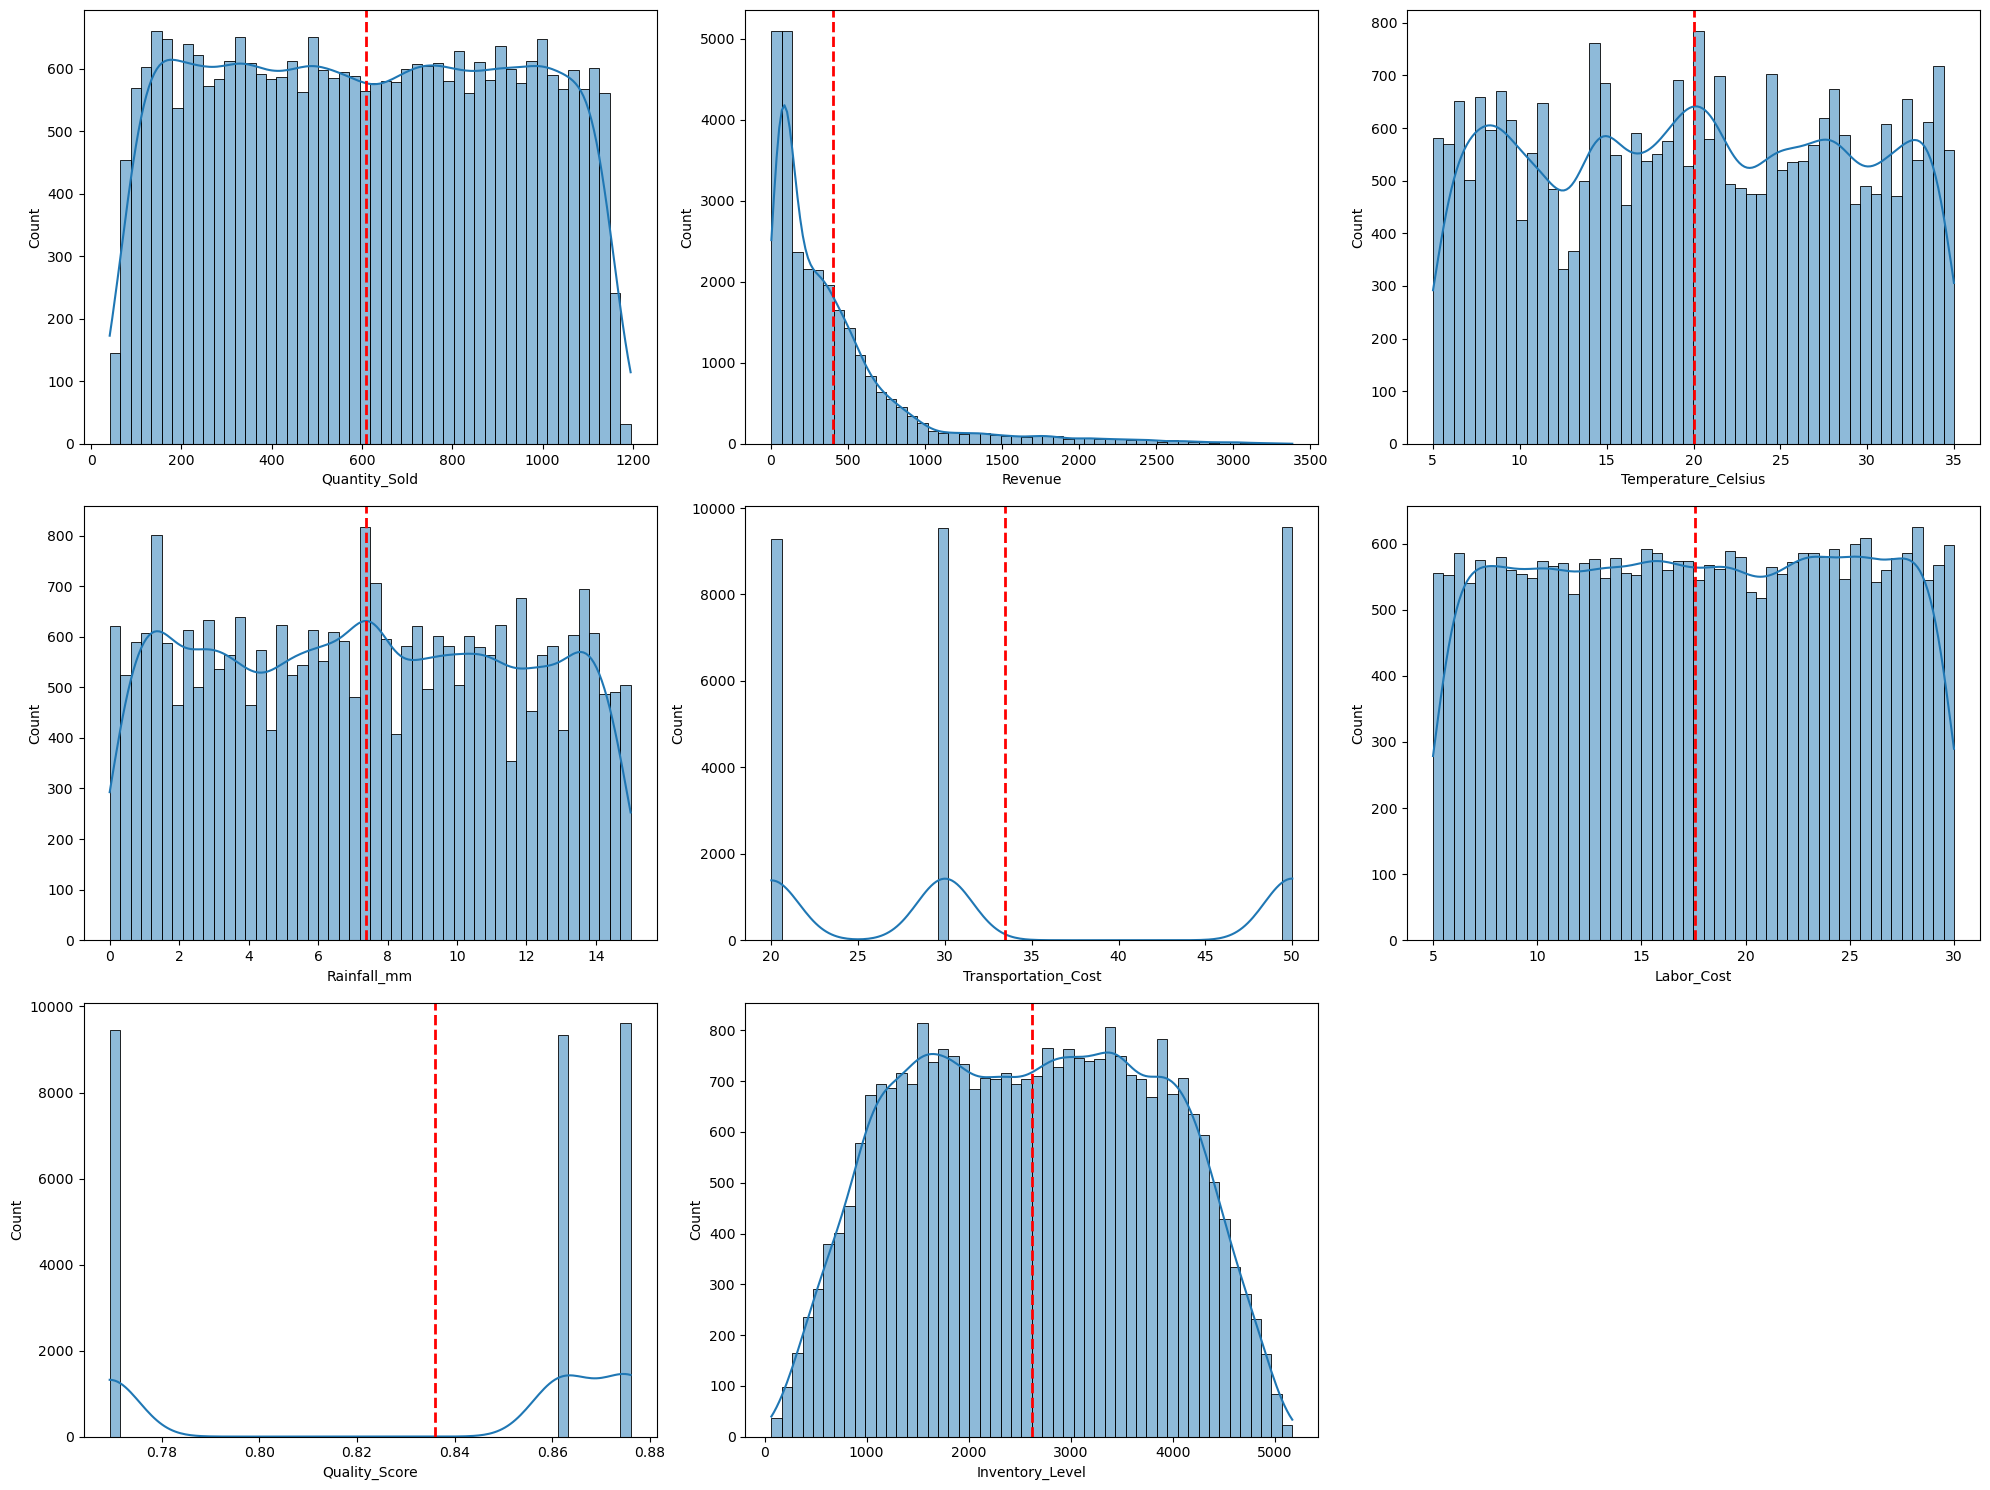

In [54]:
plt.figure(figsize=(20, 15))

numeric_vars = ['Quantity_Sold',
                'Revenue',
                'Temperature_Celsius',
                'Rainfall_mm',
                'Transportation_Cost',
                'Labor_Cost',
                'Quality_Score',
                'Inventory_Level']

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], bins=50, kde=True)
    plt.axvline(df[var].mean(), color='red', linestyle='dashed', linewidth =2)
    
    
plt.tight_layout()
plt.show()

Univariate Analysis: Categorical Variables

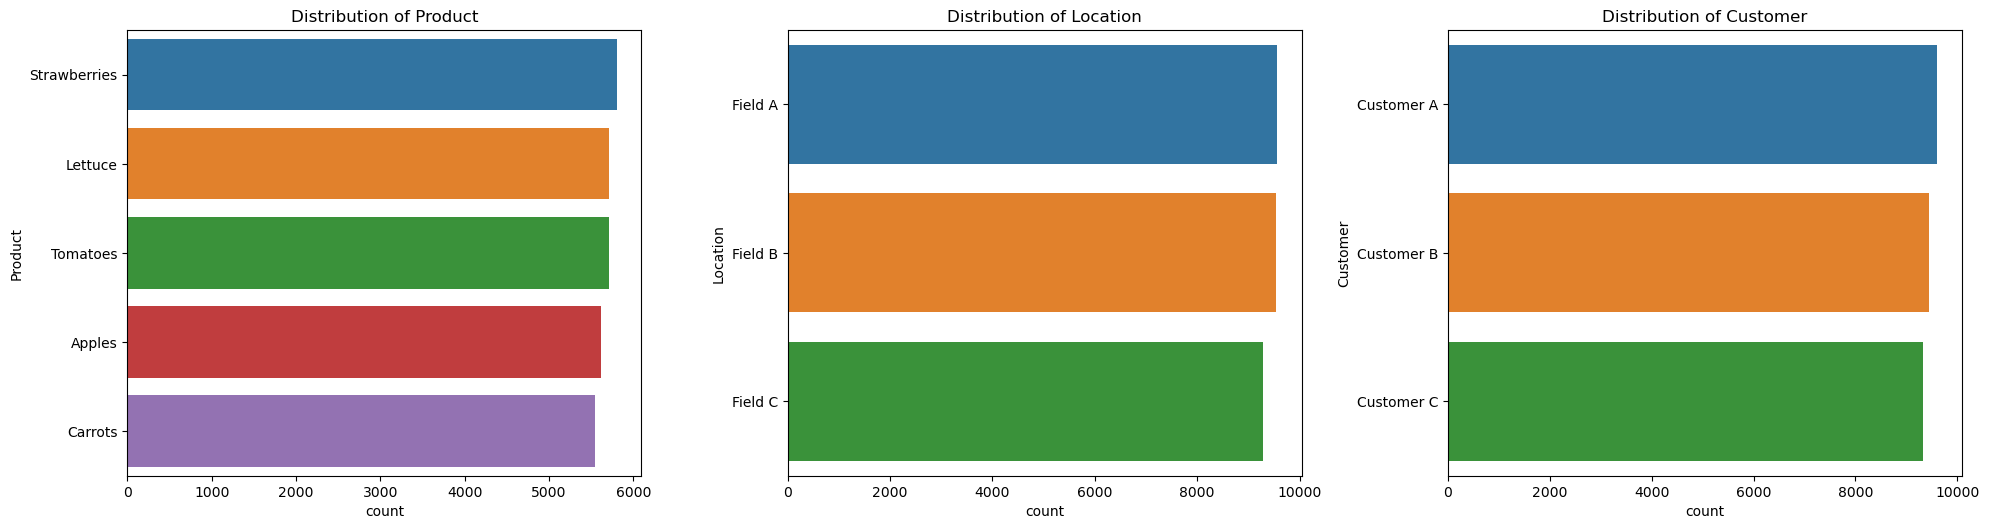

In [55]:
plt.figure(figsize=(20, 10))

categorical_vars = ['Product',
                'Location',
                'Customer',]

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, y=var,order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

#### Bivariate Analysis

We look at pairs of variables, by looking at:
    - pairs of numerical variabls
    - numerical and categorical variables
    - pairs of categorical variables
    
##### Bivariate Analysis: Numerical Variables

Starting with Correlation matrix

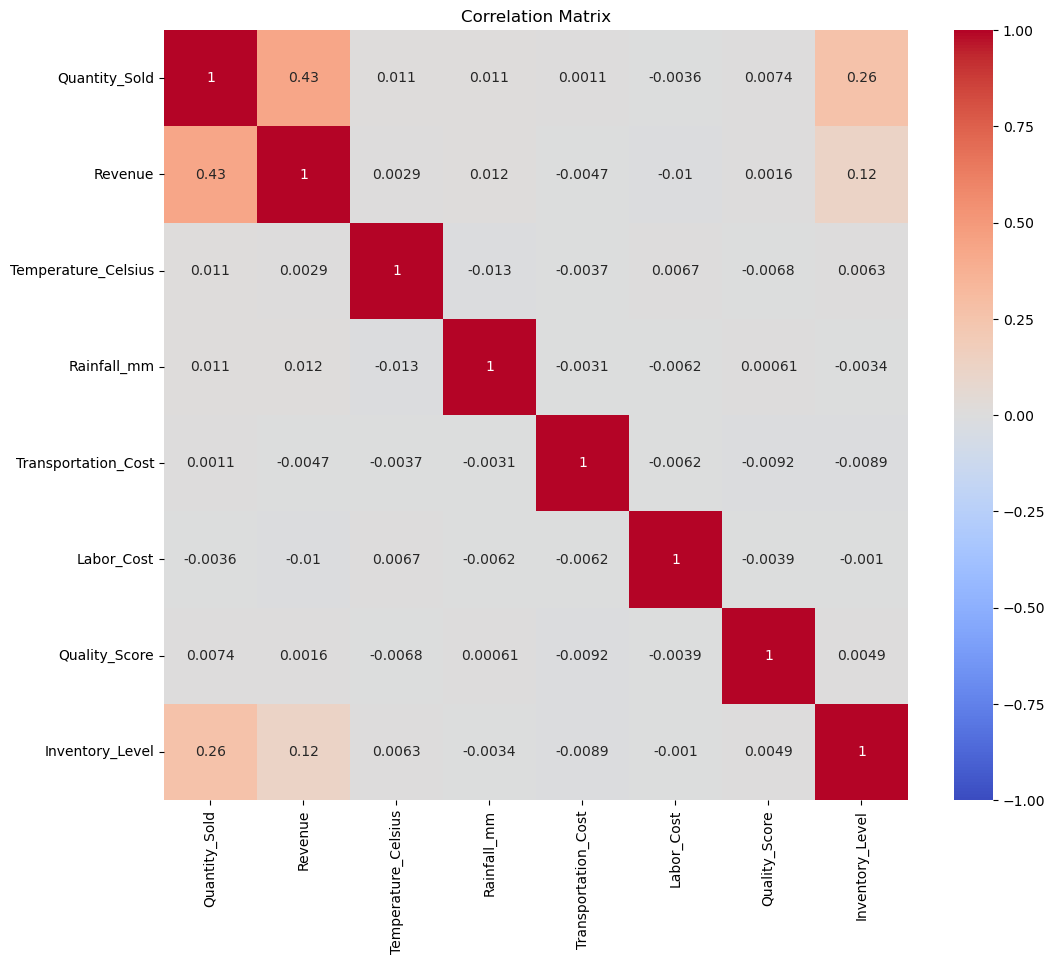

In [56]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

##### Bivariate Analysis: Numerical and Categorical Variables

Analysing 'Product' against:
- 'Revenue'
- 'Quantity_Sold'
- 'Quality_Score'

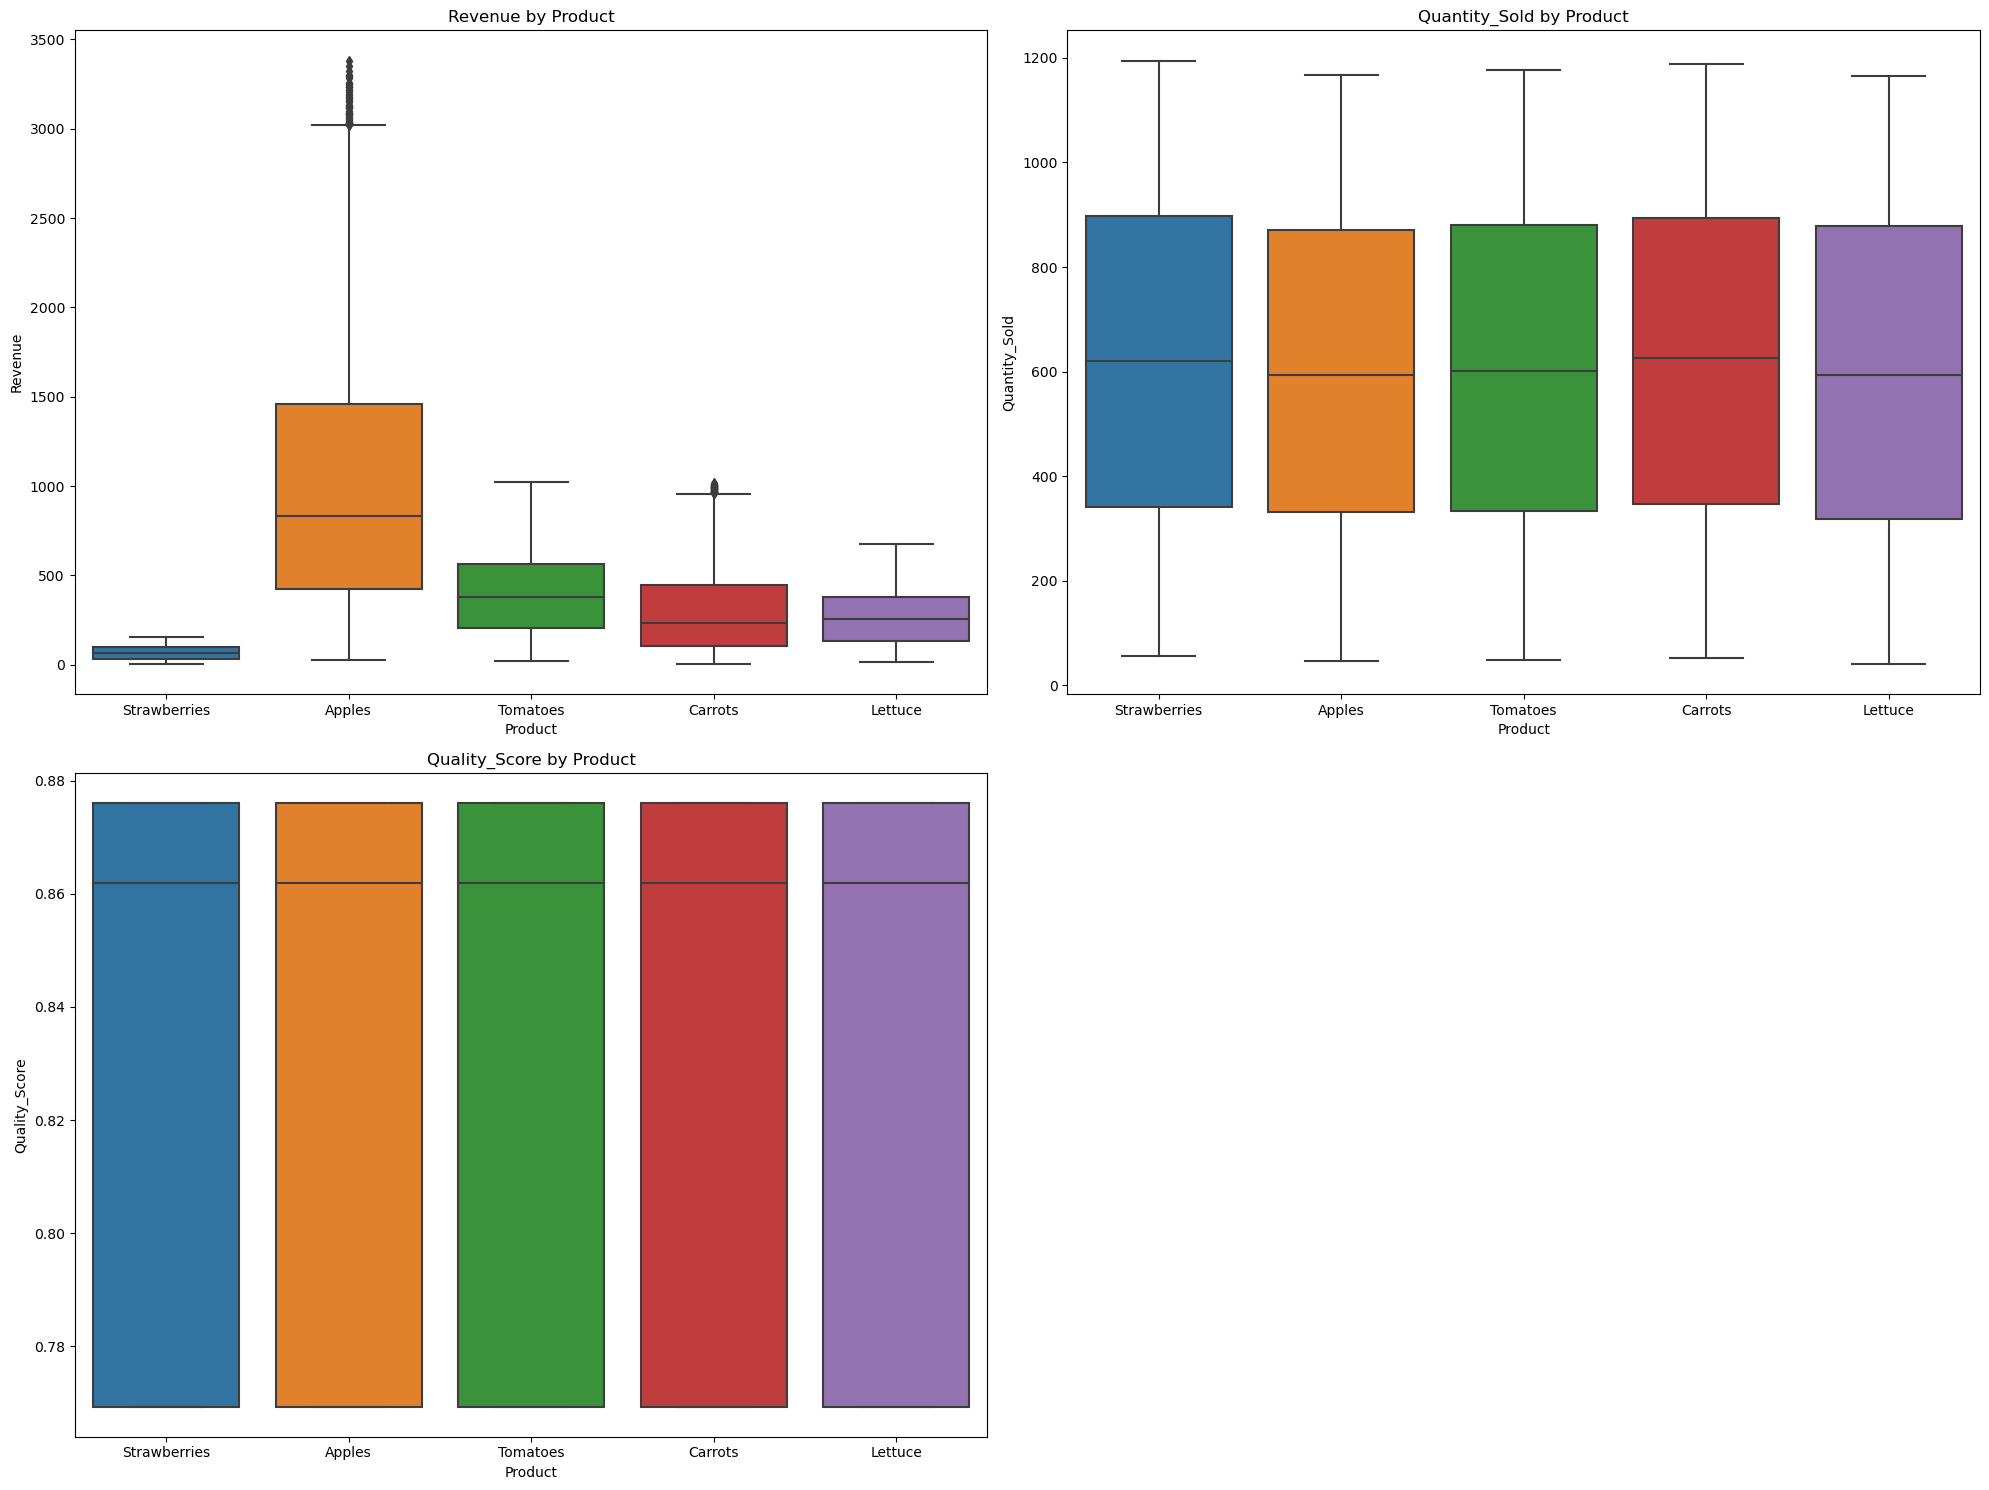

In [57]:
plt.figure(figsize= (20, 15))

key_numeric_vars = ['Revenue', 'Quantity_Sold', 'Quality_Score']

for i,var in enumerate(key_numeric_vars,1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Product', y=var)
    plt.title(f'{var} by Product')
    
    
plt.tight_layout()
plt.show()


### "Field" Vs the same key Variables

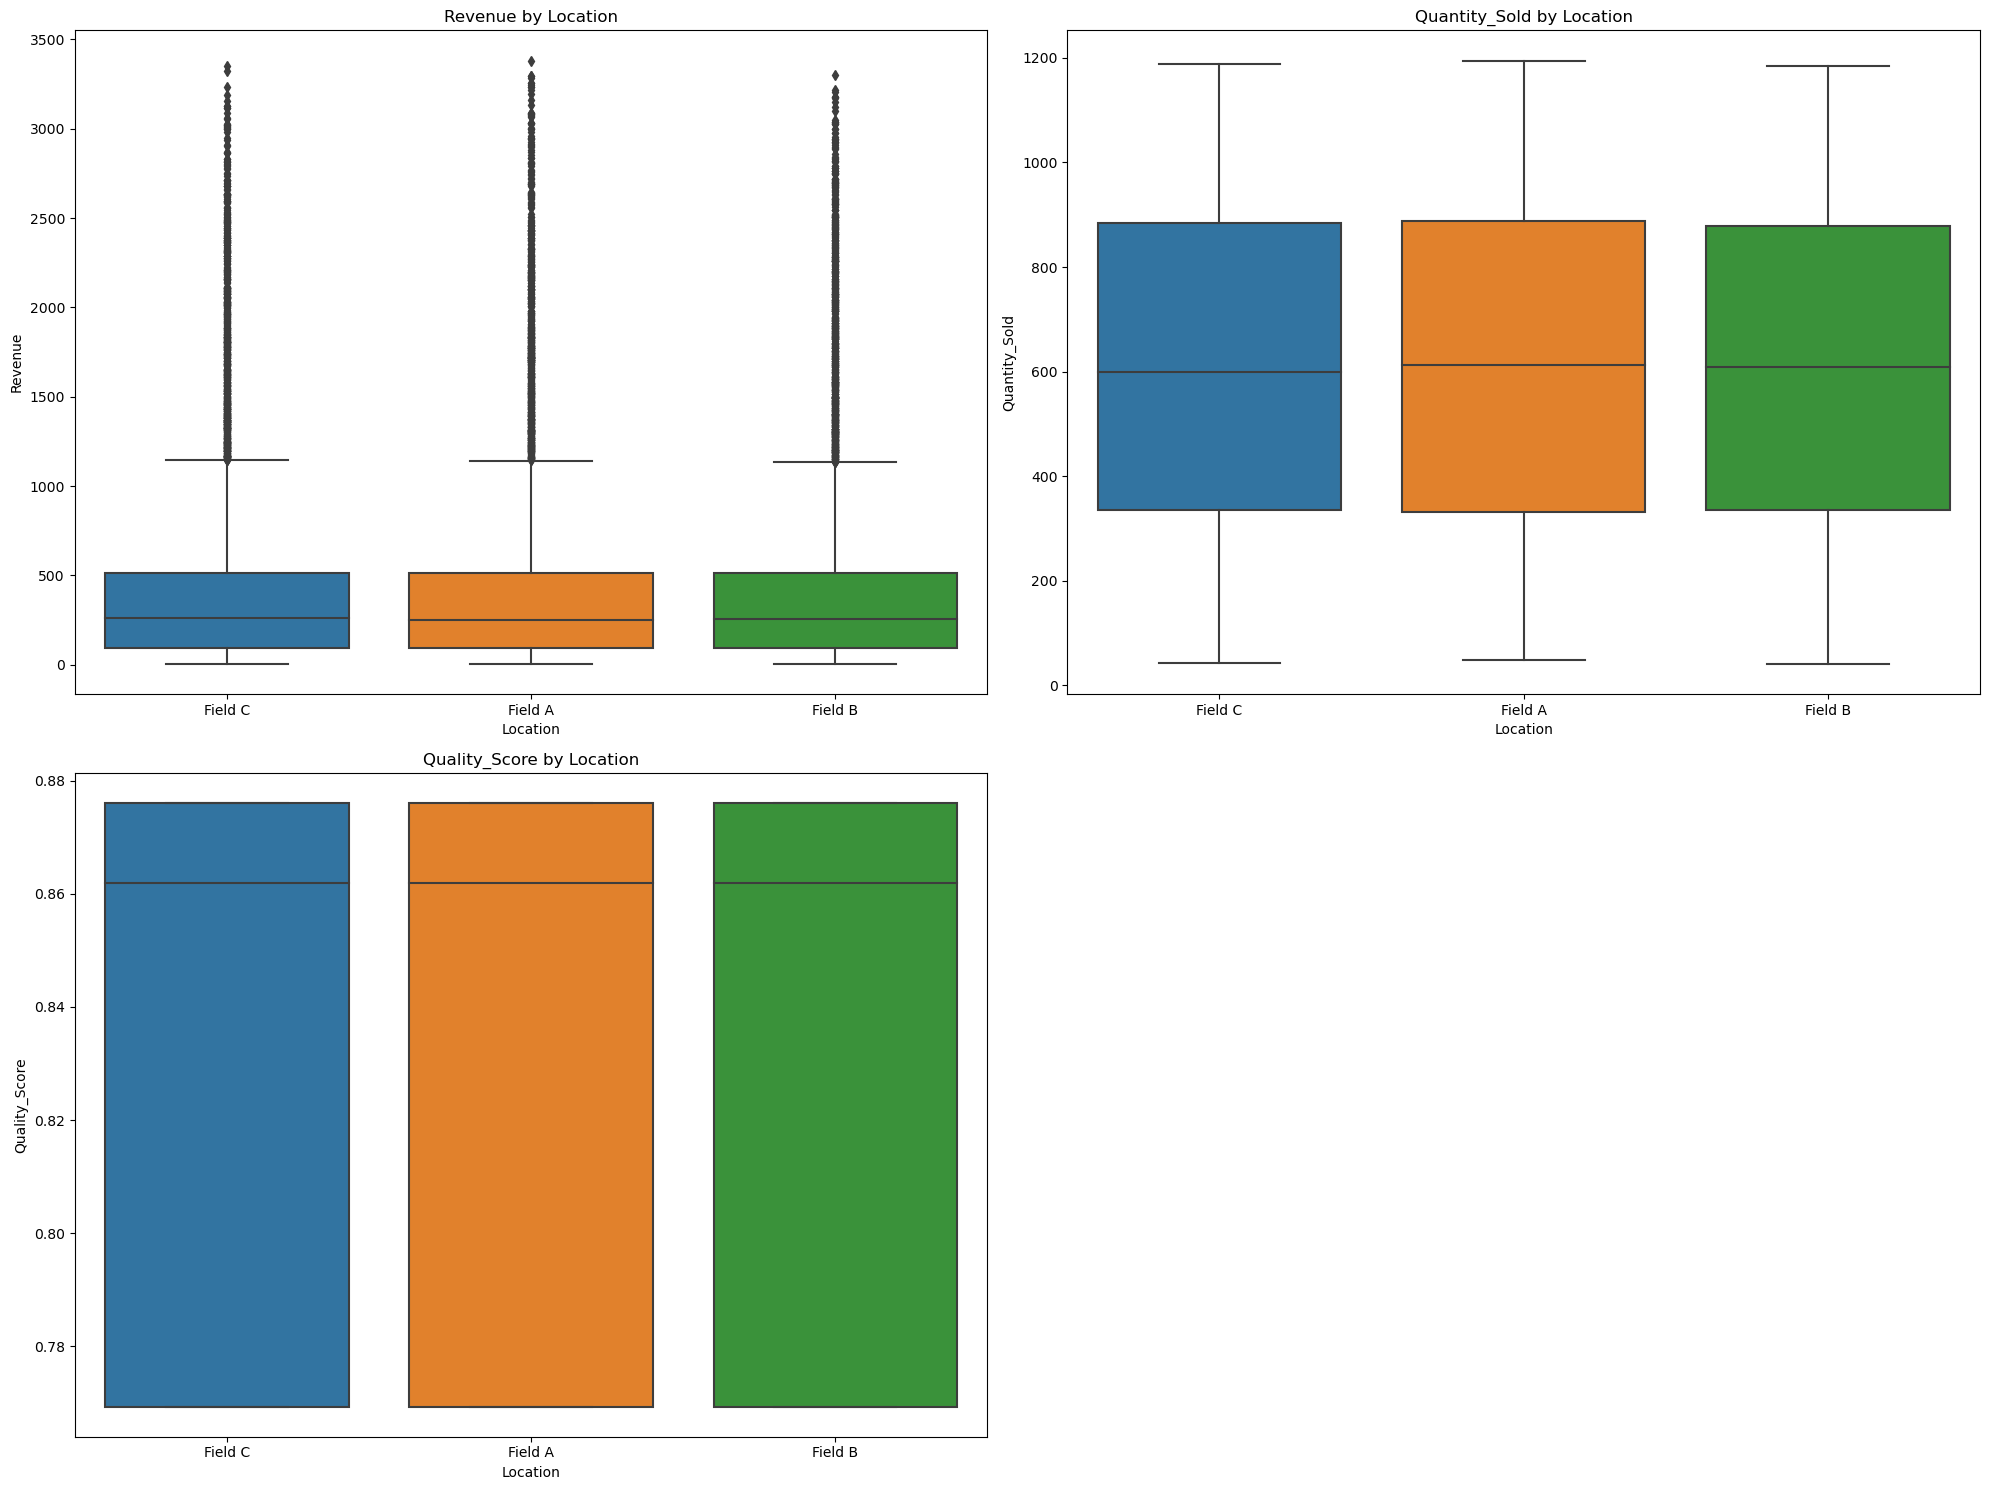

In [58]:
plt.figure(figsize=(20,15))

for i, var in enumerate(key_numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Location', y=var)
    plt.title(f'{var} by Location')
    
plt.tight_layout()
plt.show()


### Relationship between 'Customer' and the key parameters

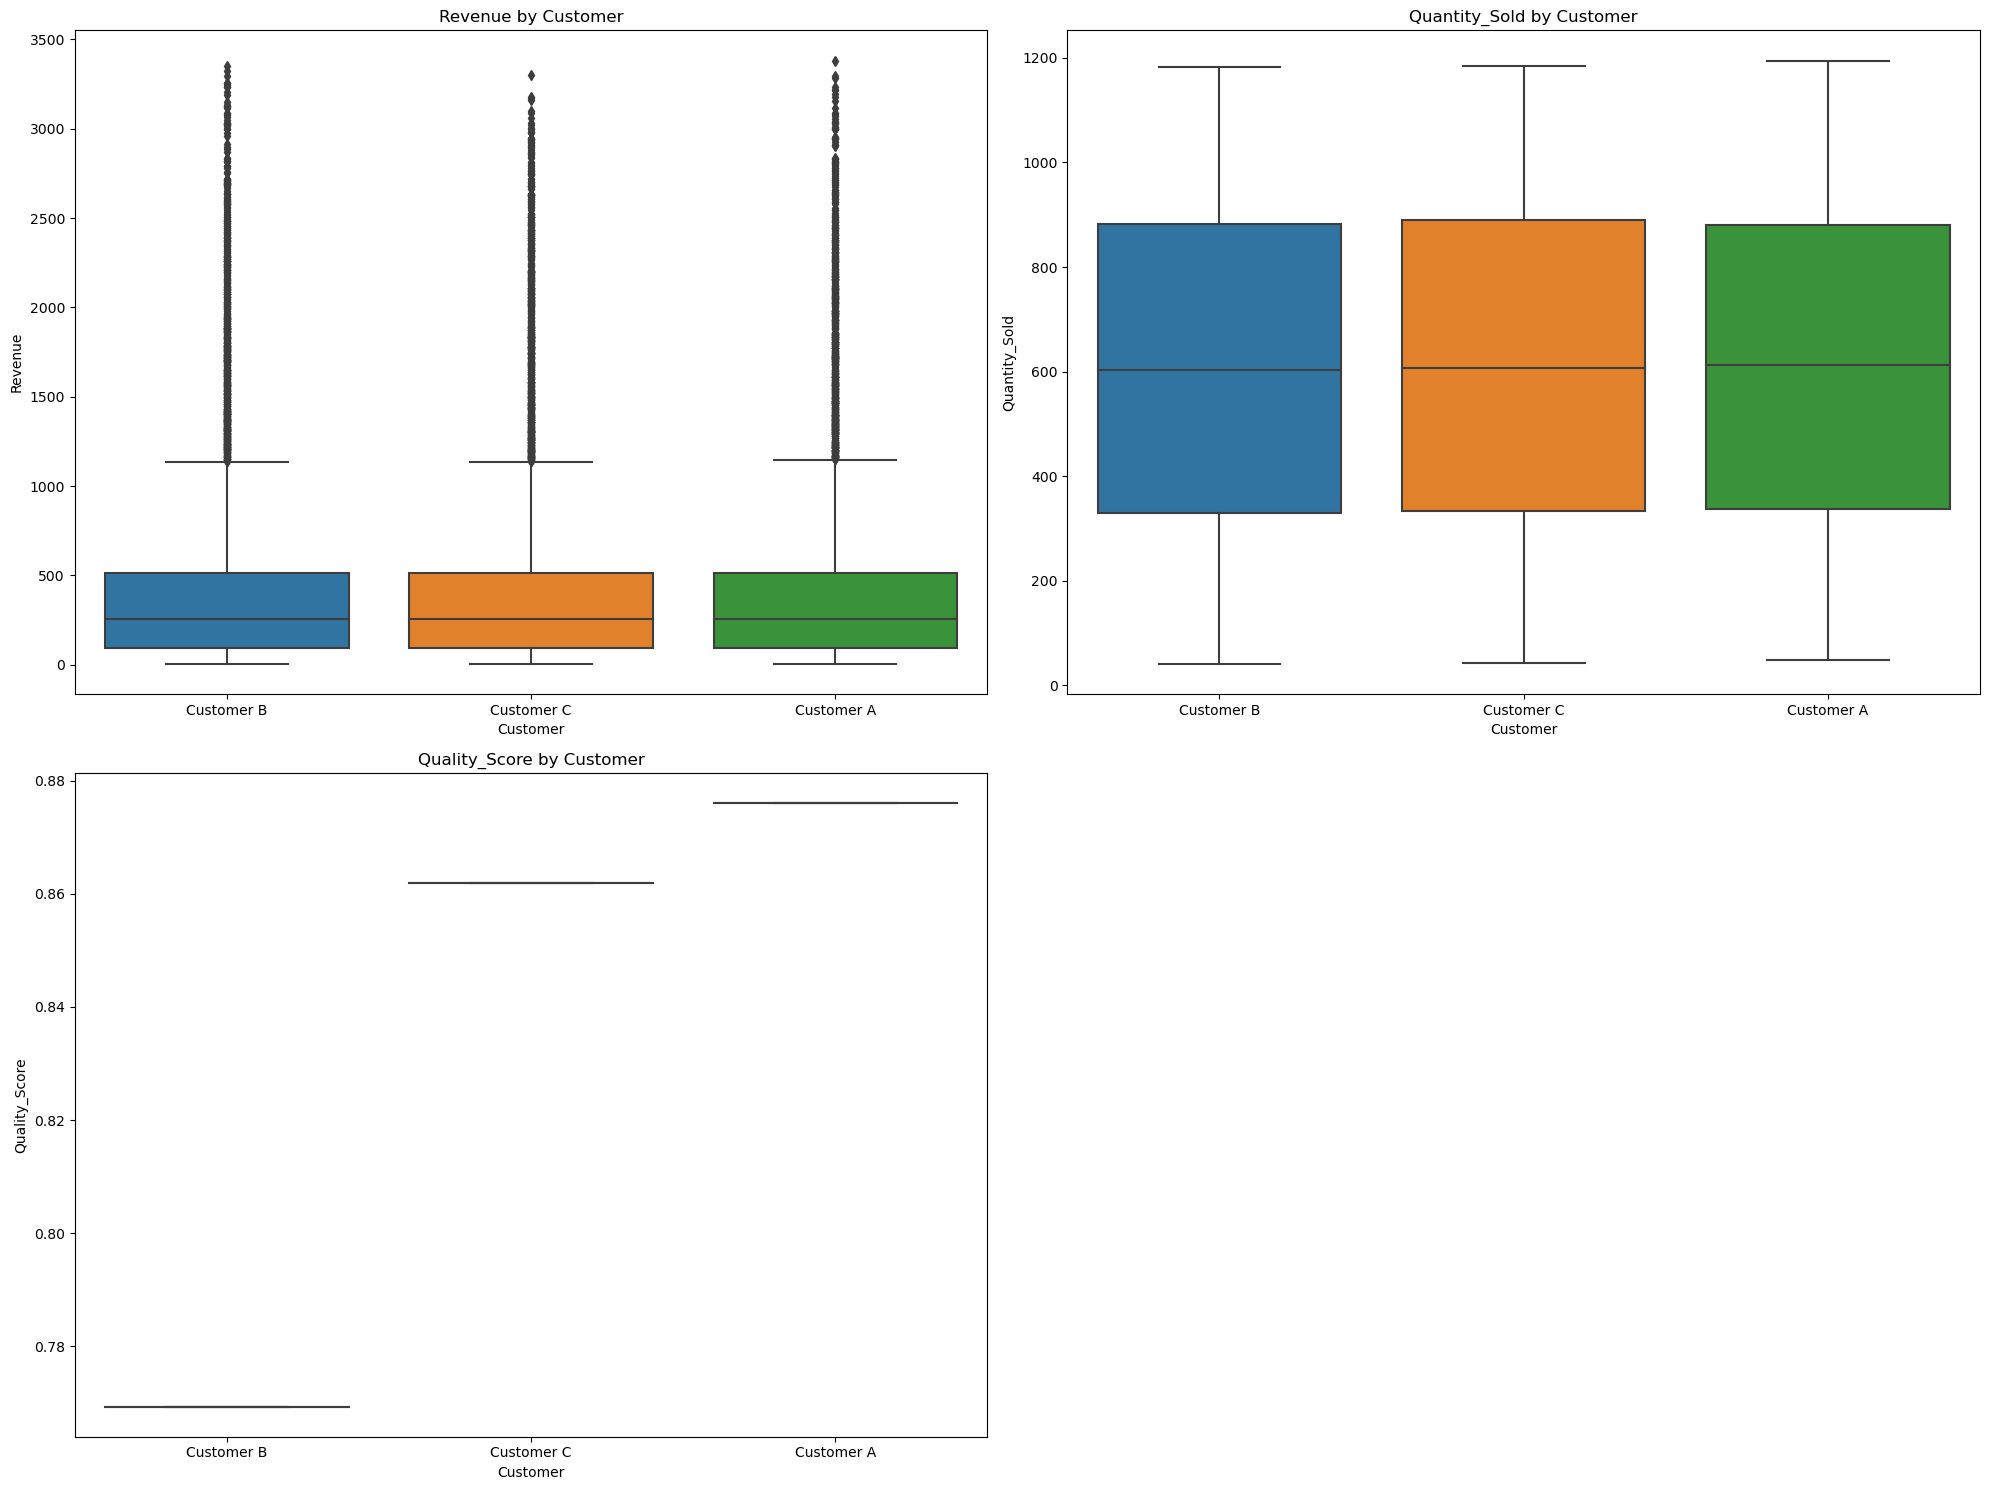

In [59]:
plt.figure(figsize= (20, 15))

for i,var in enumerate(key_numeric_vars,1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Customer', y=var)
    plt.title(f'{var} by Customer')
    
    
plt.tight_layout()
plt.show()


Visualise
- Total 'Quantity_Sold' per product,
- Total 'Revenue' per product
- Quality_Score per product

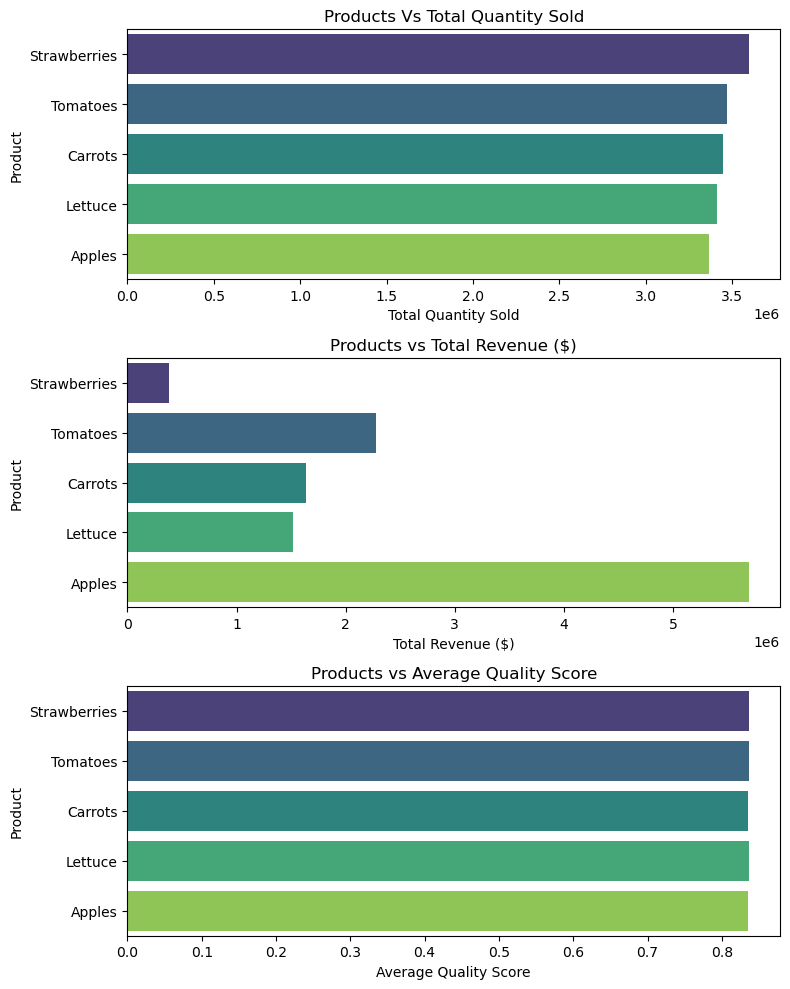

In [60]:
# Aggregate data by product
product_data = df.groupby('Product').agg({'Quantity_Sold': 'sum',
                                          'Revenue': 'sum',
                                          'Quality_Score': 'mean'}).reset_index()

# Sort the product data by total quantity sold
product_data = product_data.sort_values(by='Quantity_Sold', ascending=False)

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

# Products vs Total Quantity Sold
sns.barplot(data=product_data, x='Quantity_Sold', y='Product', ax=ax[0], palette='viridis')
ax[0].set_title('Products Vs Total Quantity Sold')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].set_ylabel('Product')

# Products vs Total Revenue  
sns.barplot(data=product_data, x='Revenue', y='Product', ax=ax[1], palette='viridis')
ax[1].set_title('Products vs Total Revenue ($)')
ax[1].set_xlabel('Total Revenue ($)')
ax[1].set_ylabel('Product')

# Products vs Average Quality Score  
sns.barplot(data=product_data, x='Quality_Score', y='Product', ax=ax[2], palette='viridis')
ax[2].set_title('Products vs Average Quality Score')
ax[2].set_xlabel('Average Quality Score')
ax[2].set_ylabel('Product')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Total Quantity sold for each product per customer.

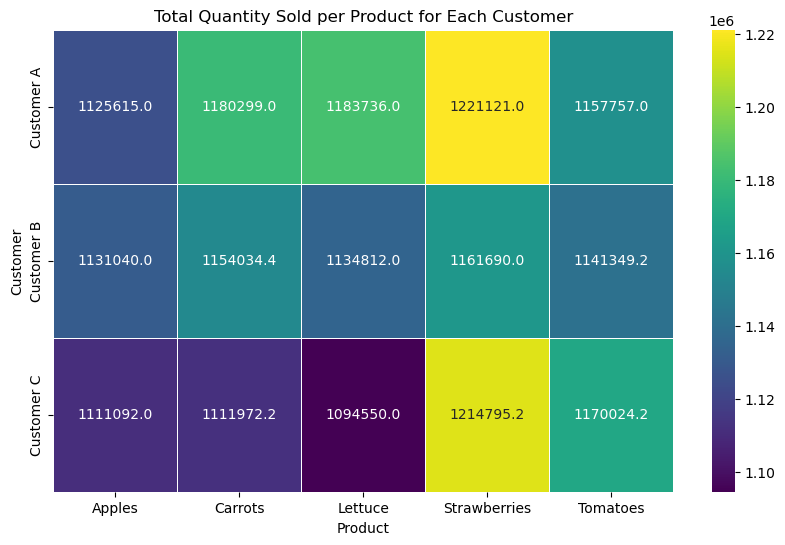

In [61]:
customer_data = df.groupby(['Customer', 'Product']).agg({'Quantity_Sold': 'sum',
                                          'Revenue': 'sum',
                                          'Quality_Score': 'mean'}).reset_index()
customer_pivot = customer_data.pivot(index='Customer', columns='Product', values='Quantity_Sold')

plt.figure(figsize=(10, 6))
sns.heatmap(customer_pivot, annot=True, cmap='viridis', fmt='.1f', linewidth=.5)
plt.title('Total Quantity Sold per Product for Each Customer')
plt.ylabel('Customer')
plt.xlabel('Product')
plt.show()

##### Bivariate Analysis: Two Categorical Variables

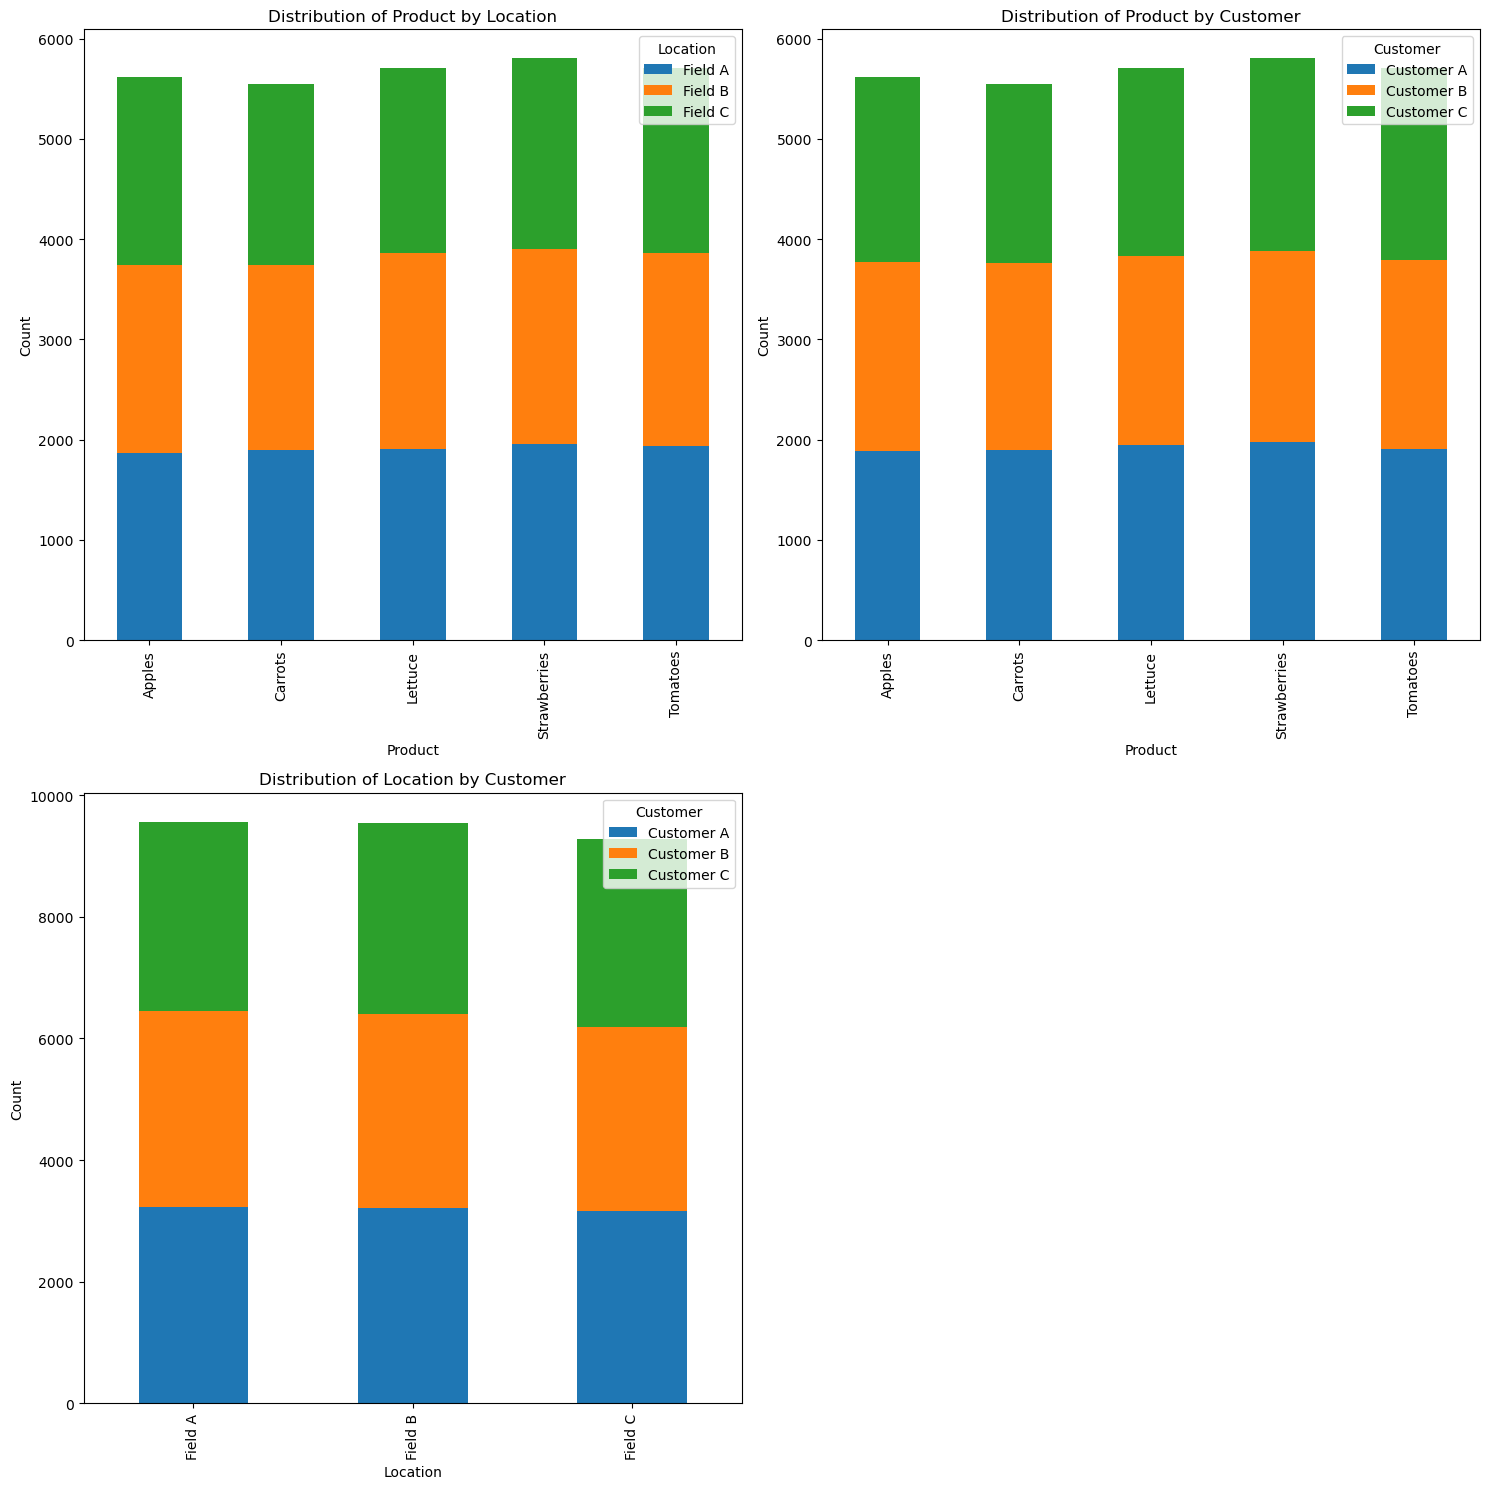

In [62]:
plt.figure(figsize=(15, 15))

pairs = [('Product', 'Location'),
         ('Product', 'Customer'),
         ('Location', 'Customer')]
for i, (p1, p2) in enumerate(pairs):
    contigency_table = pd.crosstab(df[p1], df[p2])
    
    ax = plt.subplot(2, 2, i + 1)
    contigency_table.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f'Distribution of {p1} by {p2}')
    plt.ylabel('Count')
    plt.xlabel(p1)
    
plt.tight_layout()
plt.show()

Multvariate Analysis

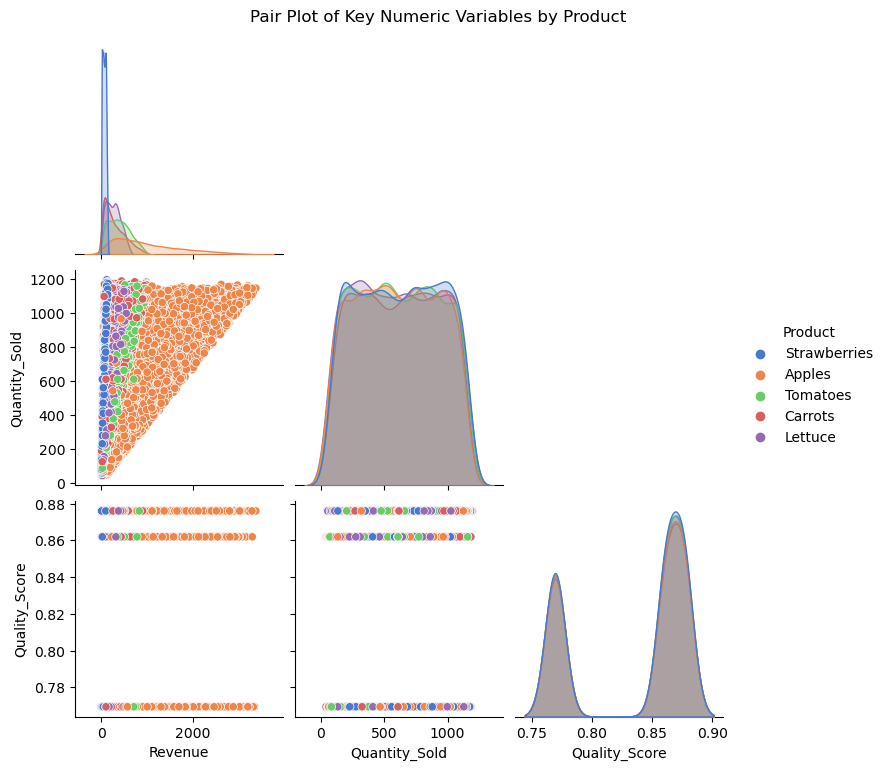

In [63]:
pair_plot = sns.pairplot(df, hue='Product', vars=key_numeric_vars, palette='muted', corner=True)
pair_plot.fig.suptitle('Pair Plot of Key Numeric Variables by Product', y=1.02)

plt.show()

#### Temporal Analysis

How the Quantity_Sold and Revenue vary daily

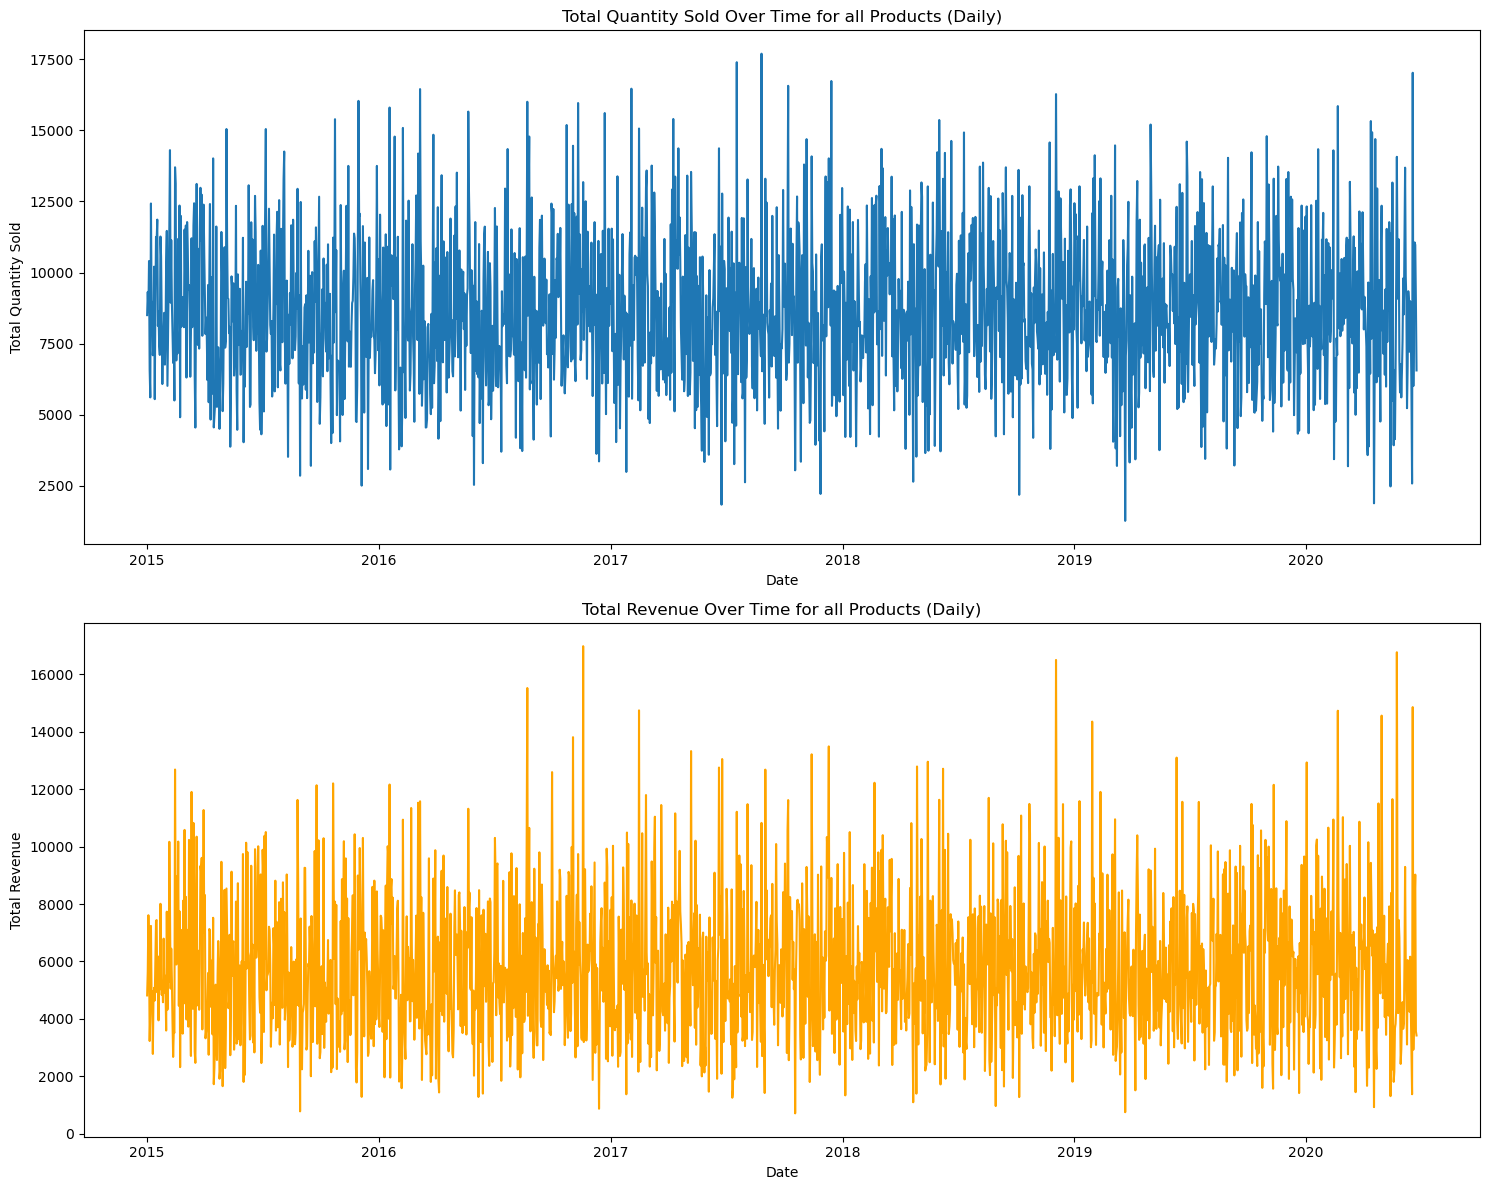

In [64]:

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and aggregate 'Quantity_Sold' and 'Revenue'
time_based_data = df.groupby('Date').agg({'Quantity_Sold': 'sum', 'Revenue': 'sum'}).reset_index()

# Plotting the aggregated data
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Quantity Sold Over Time
sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[0])
ax[0].set_title('Total Quantity Sold Over Time for all Products (Daily)')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue over Time
sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[1], color='orange')
ax[1].set_title('Total Revenue Over Time for all Products (Daily)')
ax[1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

Make the Same Plot weekly

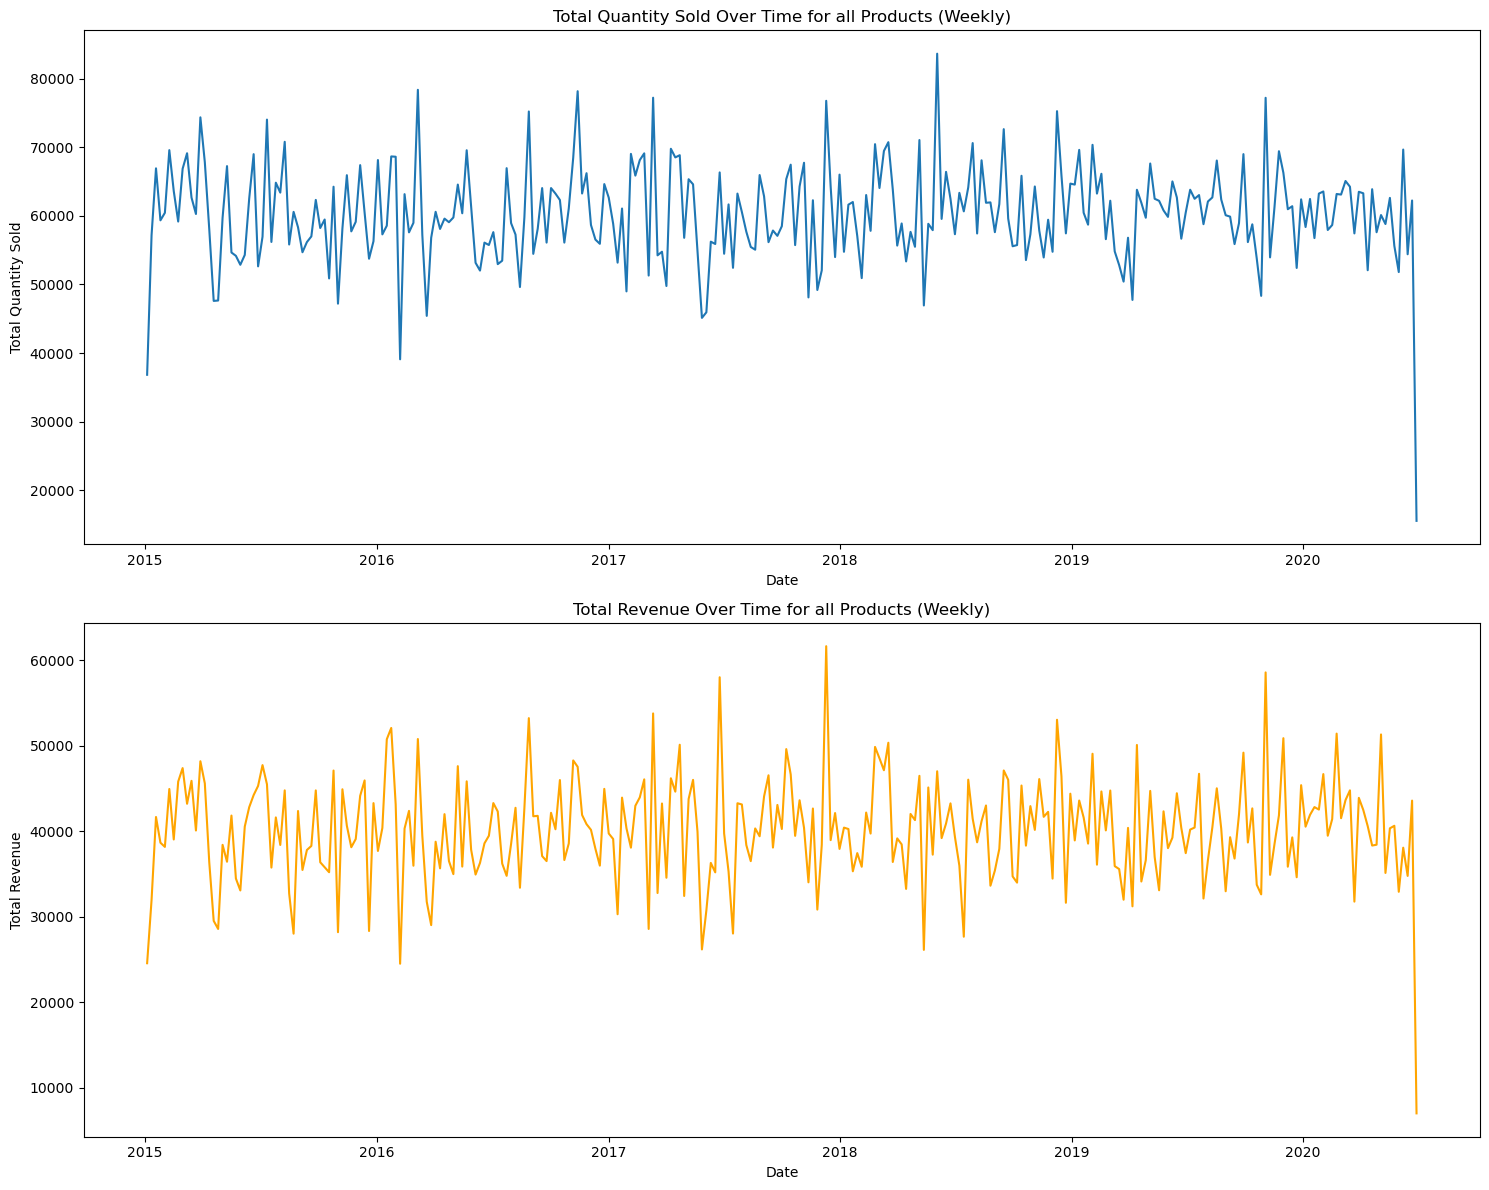

In [65]:
time_based_data = df.groupby('Date').agg({'Quantity_Sold': 'sum',
                                          'Revenue': 'sum'}).reset_index()

time_based_data = time_based_data.set_index('Date').resample('W').sum().reset_index()

fig, ax = plt.subplots(2, 1, figsize=(15,12))

#Quantity  Sold over Time
sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[0])
ax[0].set_title('Total Quantity Sold Over Time for all Products (Weekly)')
ax[0].set_ylabel('Total Quantity Sold')


# Revenue over Time
sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[1], color='orange')
ax[1].set_title('Total Revenue Over Time for all Products (Weekly)')
ax[1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()


Same plot Monthly

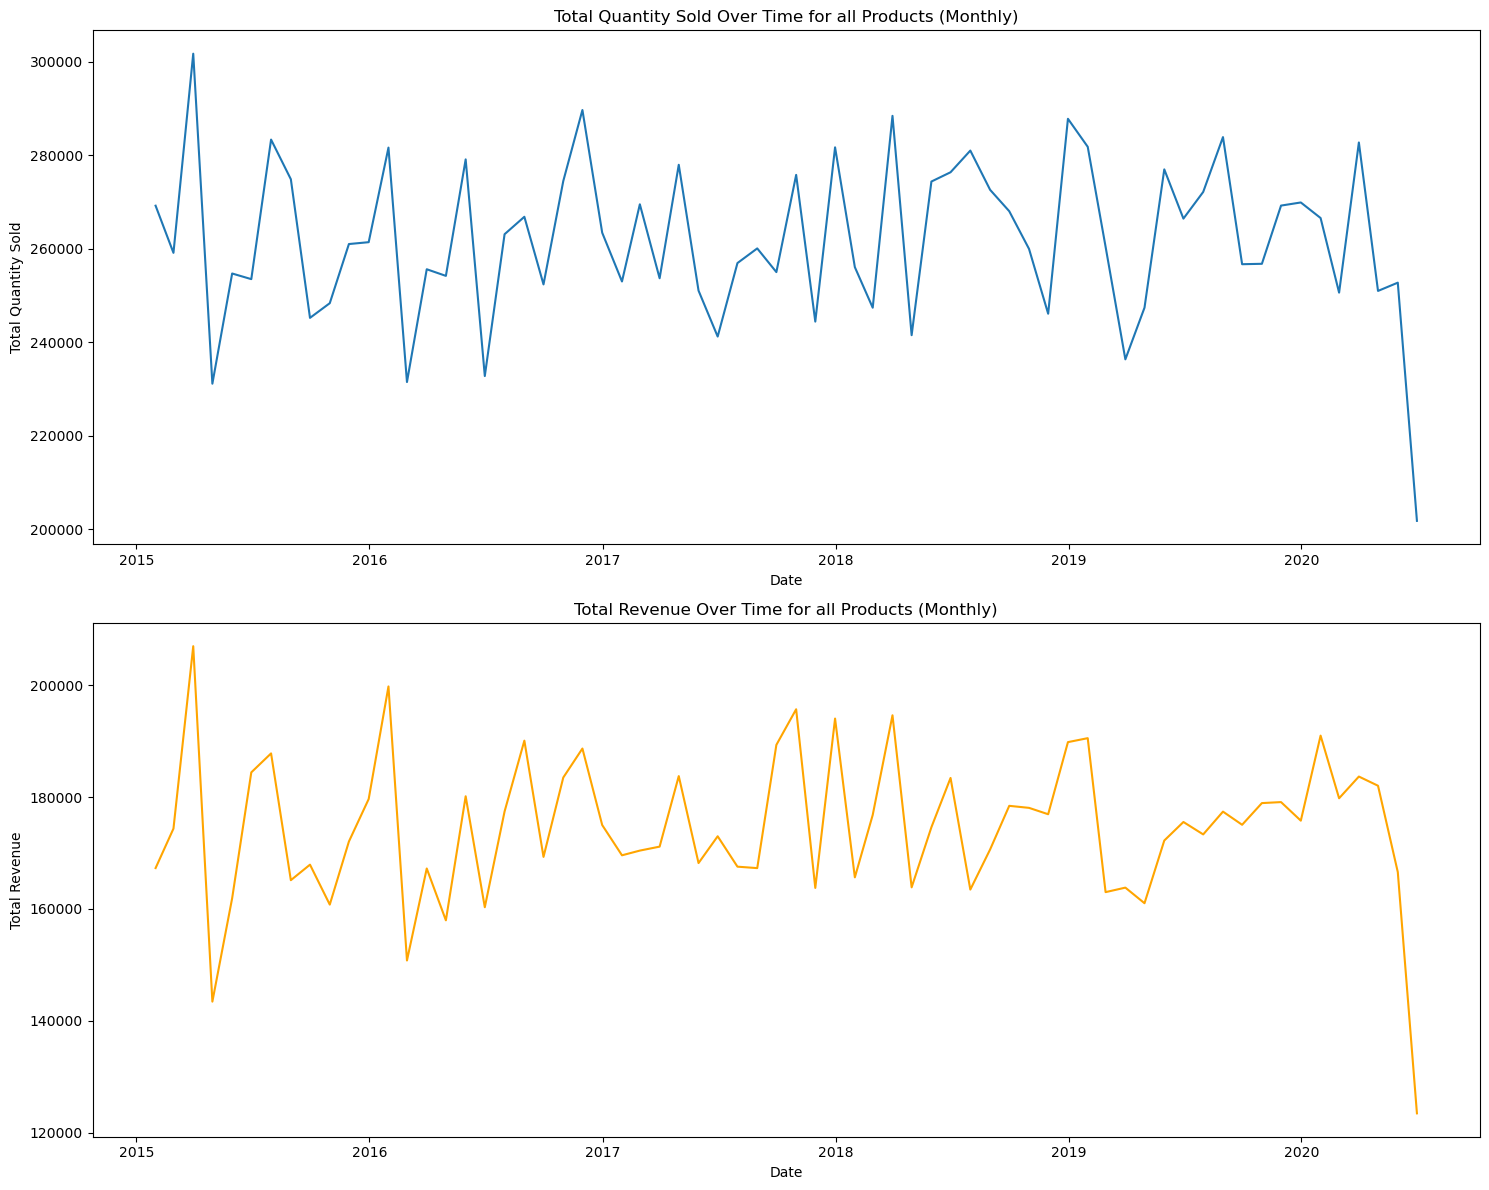

In [66]:
time_based_data = df.groupby('Date').agg({'Quantity_Sold': 'sum',
                                          'Revenue': 'sum'}).reset_index()

time_based_data = time_based_data.set_index('Date').resample('M').sum().reset_index()

fig, ax = plt.subplots(2, 1, figsize=(15,12))

#Quantity  Sold over Time
sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[0])
ax[0].set_title('Total Quantity Sold Over Time for all Products (Monthly)')
ax[0].set_ylabel('Total Quantity Sold')


# Revenue over Time
sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[1], color='orange')
ax[1].set_title('Total Revenue Over Time for all Products (Monthly)')
ax[1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()


PLot qunatity sold and revenue per product


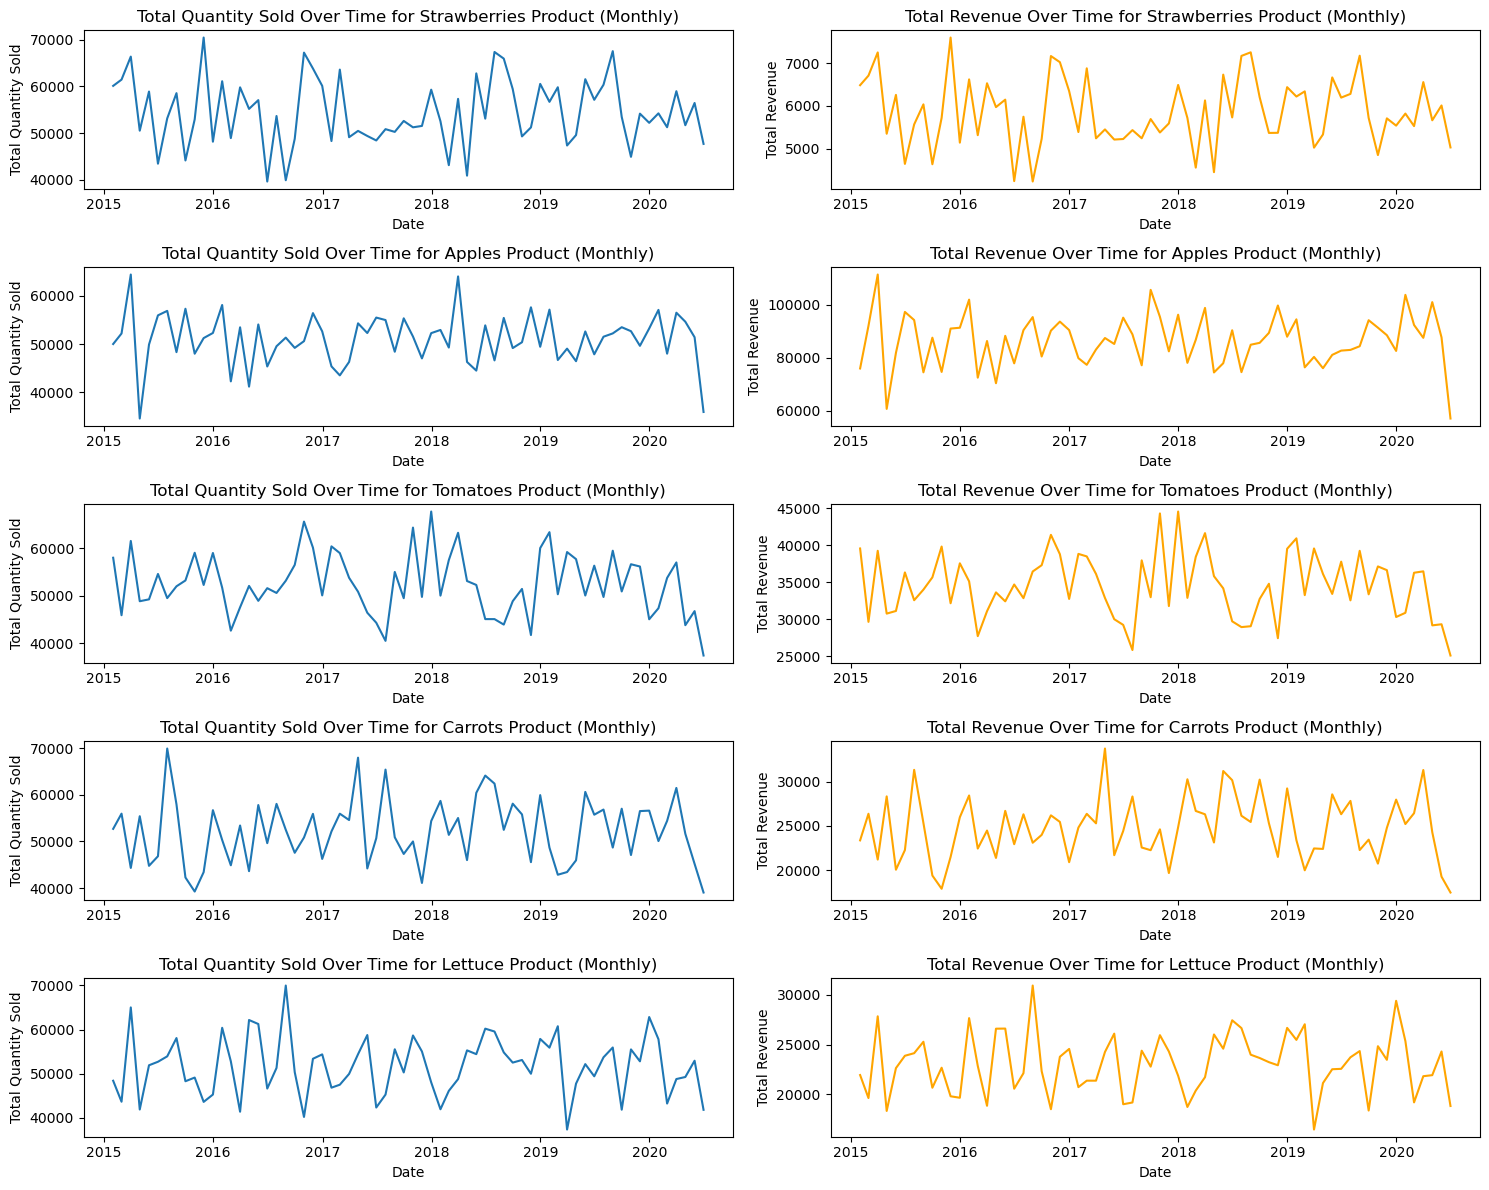

In [67]:

products = df['Product'].unique()

fig, ax = plt.subplots(len(products), 2, figsize=(15, 12))

for i, product in enumerate(products):
    time_based_data = df[df['Product'] == product]
    
    time_based_data = time_based_data.groupby('Date').agg({'Quantity_Sold': 'sum', 'Revenue': 'sum'}).reset_index()
    
    time_based_data = time_based_data.set_index('Date').resample('M').sum().reset_index()
    
    # Quantity Sold over Time
    sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[i, 0])
    ax[i, 0].set_title(f'Total Quantity Sold Over Time for {product} Product (Monthly)')
    ax[i, 0].set_ylabel('Total Quantity Sold')

    # Revenue over Time
    sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[i, 1], color='orange')
    ax[i, 1].set_title(f'Total Revenue Over Time for {product} Product (Monthly)')
    ax[i, 1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

##  Feature Engineering
Splitting Dataset into train And test sets


In [68]:
train_data = dict()
test_data = dict()

for product in products:
    df_product = df[df['Product'] == product]
    
    df_product = df_product.groupby('Date').agg({'Quantity_Sold': 'sum',
                                                'Revenue': 'sum'}).reset_index()
    
    df_product = df_product.set_index('Date').resample('M').sum().reset_index()
    
    train_data[product] = df_product[df_product['Date'].dt.year < 2019].reset_index()
    test_data[product] = df_product[df_product['Date'].dt.year >= 2019].reset_index()
    

Visualize the split

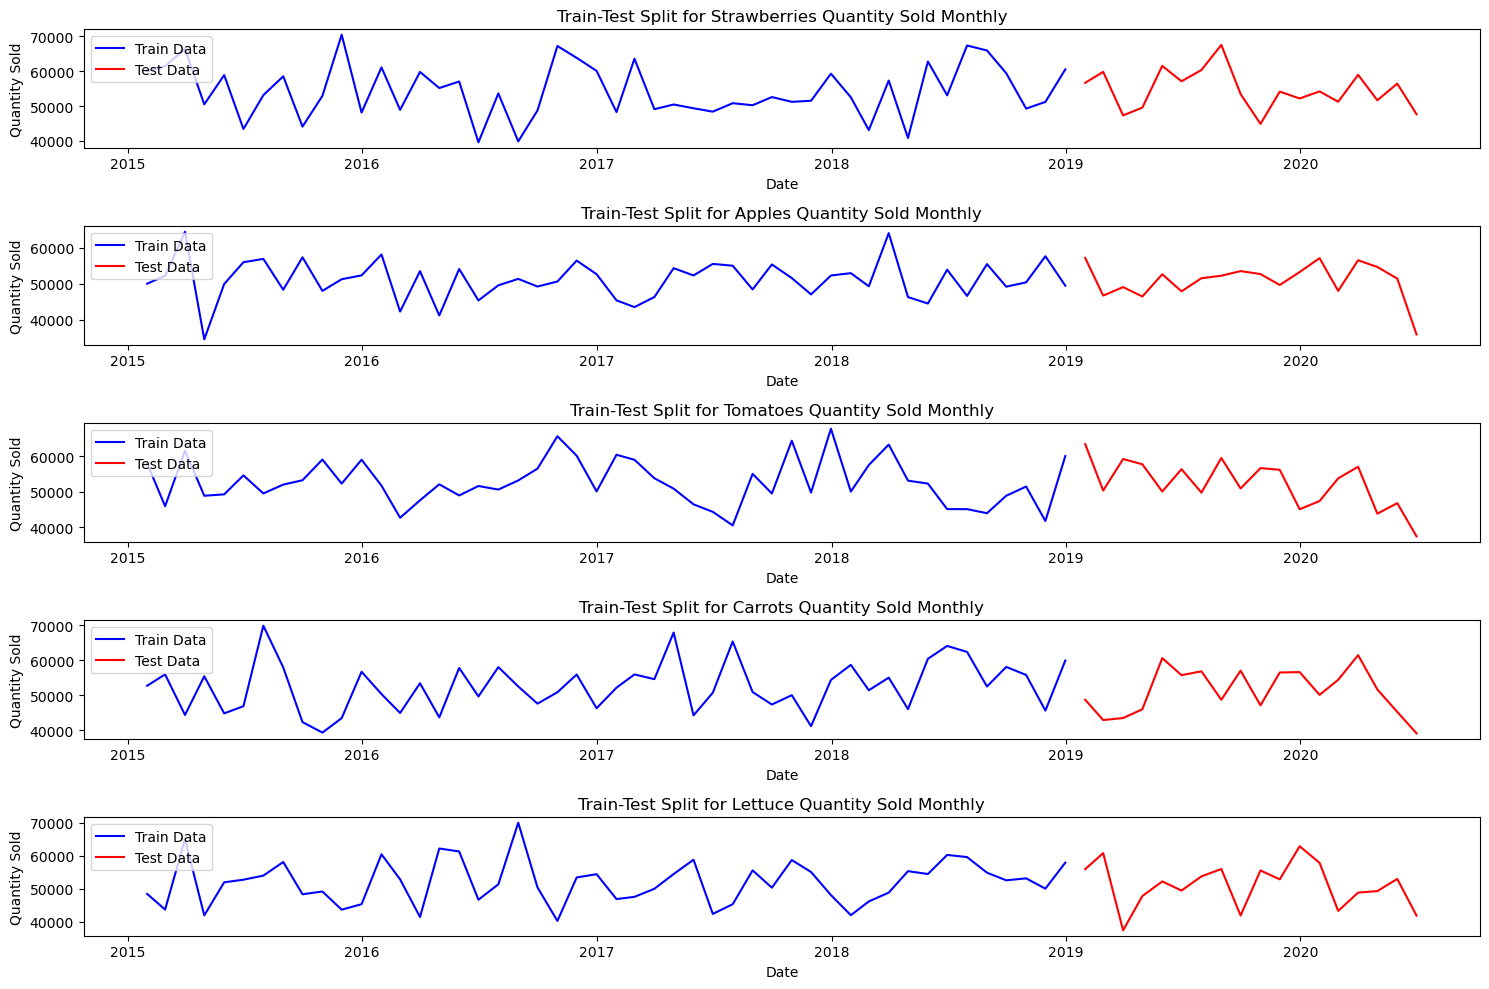

In [69]:
fig, ax = plt.subplots(len(products), 1, figsize=(15, 10))

for i, product in enumerate(products):
    ax[i].plot(train_data[product]['Date'],
               train_data[product]['Quantity_Sold'],
               color='blue')
    
    ax[i].plot(test_data[product]['Date'],
               test_data[product]['Quantity_Sold'],
               color='red')
    ax[i].set_title(f'Train-Test Split for {product} Quantity Sold Monthly')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Quantity Sold')
    ax[i].legend(['Train Data', 'Test Data'], loc='upper left')

plt.tight_layout()
plt.show()


## 5. Modelling

The models that will be used include:
    - ARIMA
    - Prophet,
    - RandomForestRegressor.
    
For evaluation, we will be using:
- Mean Absolute Error (MAE),
- Root Mean Square Error (RMSE).
        
#### Forecasting with ARIMA
Stattionarity test

In [70]:
def adf_test(series):
    result = adfuller(series)
    dfoutput = pd.Series(result[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#lags used',
                                             'number of observations'])
    
    for key, value in result[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    return dfoutput


Performing the Sationarity test.

In [71]:
stationarity_test = dict()

for product in products:
    product_data = pd.concat([train_data[product], test_data[product]])
    stationarity_test[product] = adf_test(product_data['Quantity_Sold'])
    
pd.DataFrame(stationarity_test)

Strawberries        Apples   Tomatoes       Carrots  \
Test Statistic             -5.058980 -9.876209e+00  -4.368359 -7.209263e+00   
p-value                     0.000017  3.876435e-17   0.000338  2.257203e-10   
#lags used                  2.000000  0.000000e+00   8.000000  0.000000e+00   
number of observations     63.000000  6.500000e+01  57.000000  6.500000e+01   
Critical Value (1%)        -3.538695 -3.535217e+00  -3.550670 -3.535217e+00   
Critical Value (5%)        -2.908645 -2.907154e+00  -2.913766 -2.907154e+00   
Critical Value (10%)       -2.591897 -2.591103e+00  -2.594624 -2.591103e+00   

                             Lettuce  
Test Statistic         -7.433840e+00  
p-value                 6.258368e-11  
#lags used              1.000000e+00  
number of observations  6.400000e+01  
Critical Value (1%)    -3.536928e+00  
Critical Value (5%)    -2.907887e+00  
Critical Value (10%)   -2.591493e+00

Plot ACF and PACF 

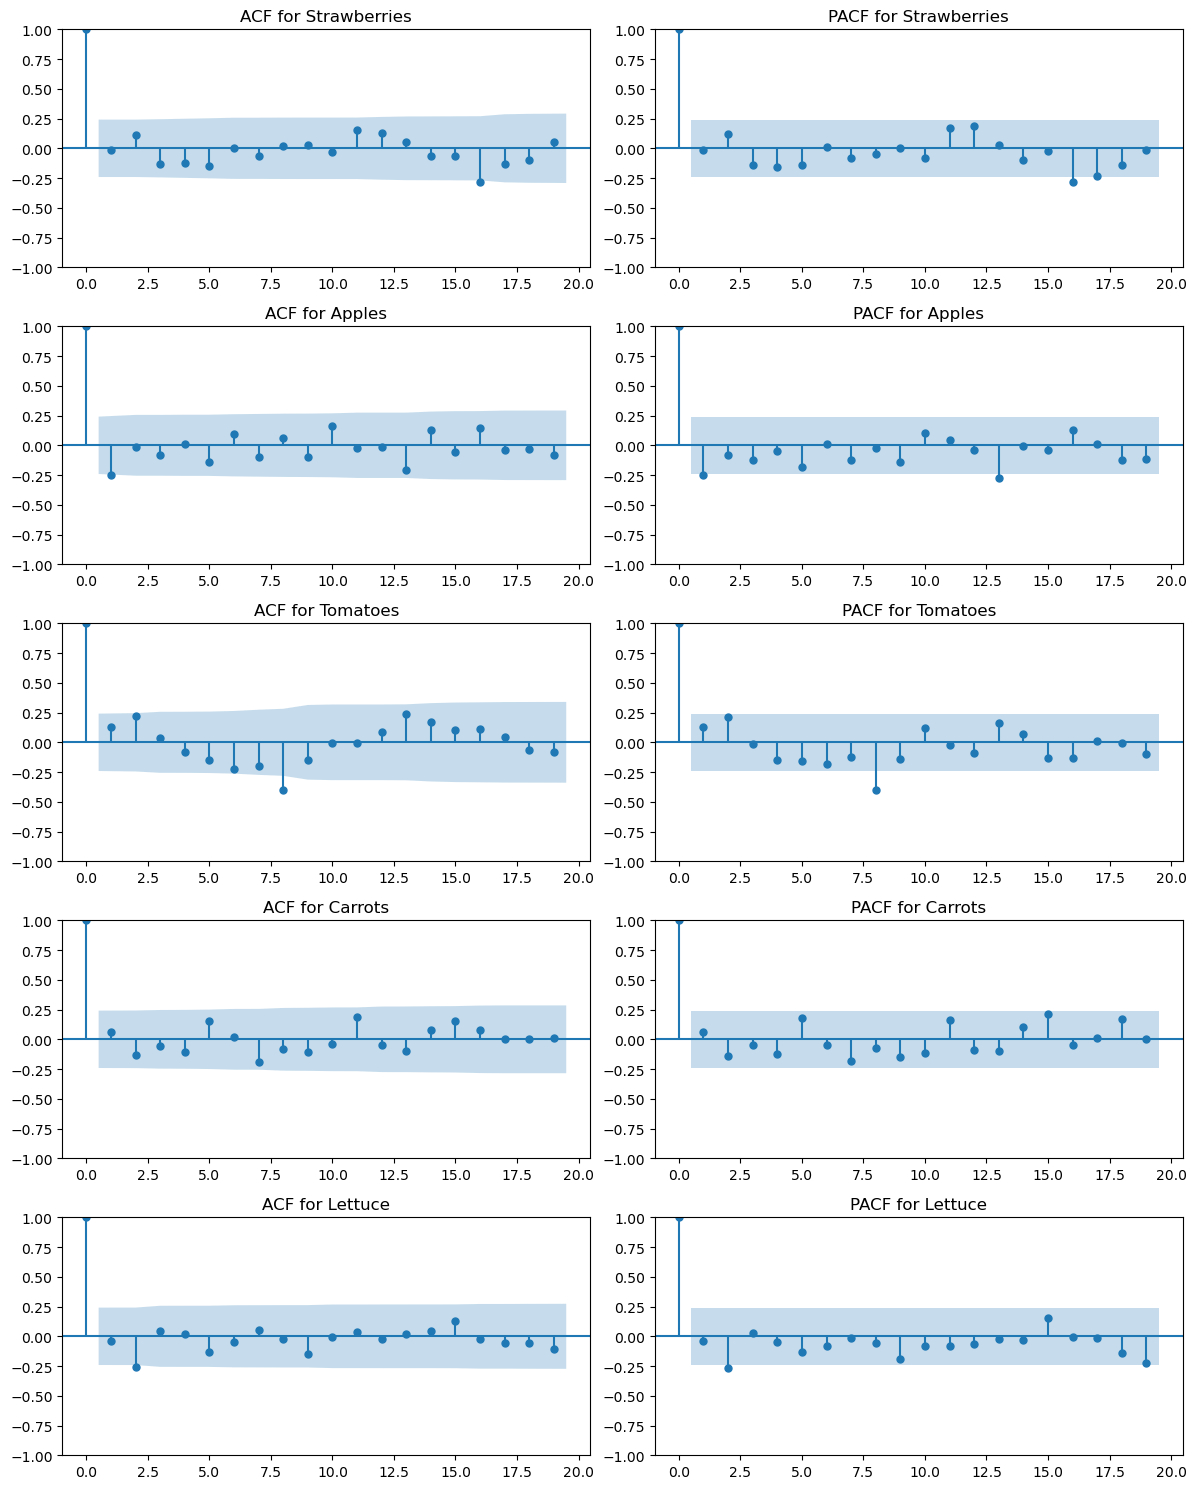

In [72]:
fig, ax = plt.subplots(len(products), 2, figsize=(12, 15))

for i, product in enumerate(products):
    product_data = pd.concat([train_data[product], test_data[product]])
    
    plot_acf(product_data['Quantity_Sold'], ax=ax[i][0])
    ax[i][0].set_title(f'ACF for {product}')
    
    plot_pacf(product_data['Quantity_Sold'], ax=ax[i][1])
    ax[i][1].set_title(f'PACF for {product}')

plt.tight_layout()
plt.show()

Build the models, and evaluate them

In [73]:
mae, rmse, mape = 0, 0, 0 
arima_mape_scores = dict()

arima_forecasts = dict()

for product in products:
    train = train_data[product]['Quantity_Sold'].values
    test = test_data[product]['Quantity_Sold'].values
        
    model = ARIMA(train, order=(1, 0, 1))
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=len(test))
    arima_forecasts[product] = forecast
    
    product_mae = mean_absolute_error(test, forecast)
    product_rmse = mean_squared_error(test, forecast, squared=False)
    product_mape = mean_absolute_percentage_error(test, forecast) * 100
    
    mae += product_mae
    rmse += product_rmse
    mape += product_mape
    
    arima_mape_scores[product] = product_mape
    
n_products = len(products)

mae /= n_products
rmse /= n_products
mape /= n_products

print('MAE:', mae) 
print('RMSE:', rmse) 
print('MAPE:', mape) 

MAE: 4915.419962117331
RMSE: 6059.511862209205
MAPE: 9.971574059237227


Plot the train, test and forecast data.

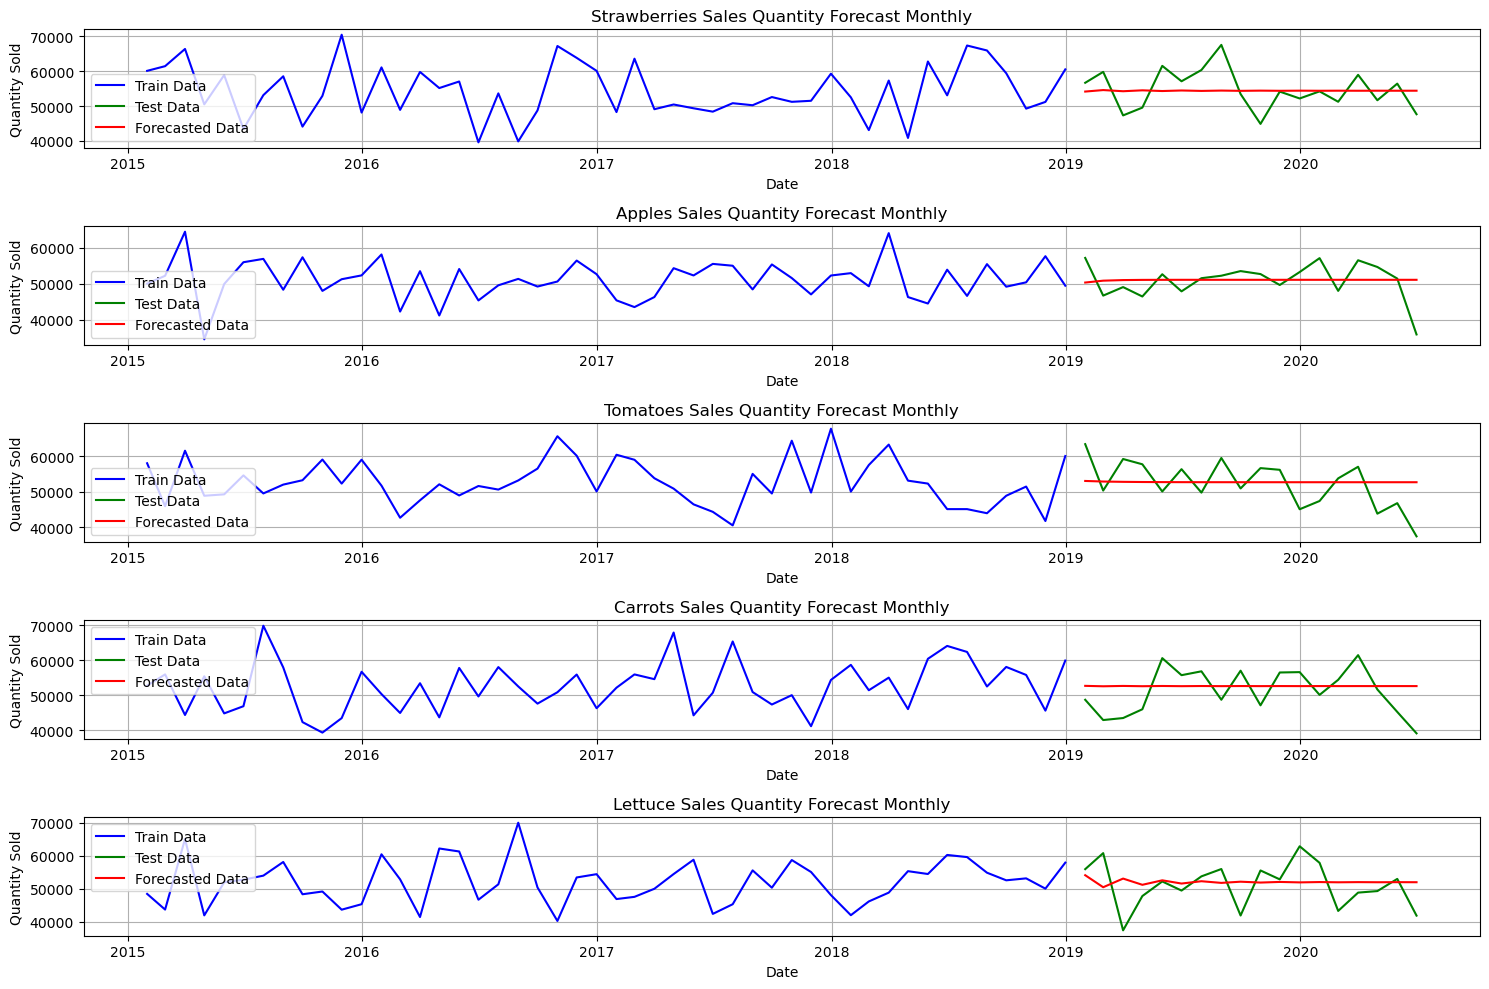

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, product in enumerate(products):
    plt.subplot(len(products), 1, i + 1)
    
    plt.plot(train_data[product]['Date'],
             train_data[product]['Quantity_Sold'],
             label='Actual Quantity Sold (Train Data)',
             color='blue')
    plt.plot(test_data[product]['Date'],
             test_data[product]['Quantity_Sold'],
             label='Actual Quantity Sold (Test Data)',
             color='green')
    plt.plot(test_data[product]['Date'],
             arima_forecasts[product],
             label='Forecasted Quantity to be Sold',
             color='red',
             linestyle='-')
    plt.title(f'{product} Sales Quantity Forecast Monthly')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend(['Train Data', 'Test Data', 'Forecasted Data'])
    plt.grid(True)
               
plt.tight_layout()
plt.show()


### Forecasting With Prophet

With prophet, Train and Evaluate the Models

In [82]:

mae, rmse, mape = 0, 0, 0

prophet_models = dict()
prophet_forecasts = dict()
prophet_mape_scores = dict()

for product in products:
    train = train_data[product][['Date', 'Quantity_Sold']]
    test = test_data[product][['Date', 'Quantity_Sold']]
    
    train.columns = ['ds', 'y']
    test.columns = ['ds', 'y']
    
    model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model_prophet.fit(train)
    prophet_models[product] = model_prophet
    
    future_dates = model_prophet.make_future_dataframe(periods=len(test), freq='M')
    
    all_forecast = model_prophet.predict(future_dates)
    prophet_forecasts[product] = all_forecast
    
    test_forecast = all_forecast[-len(test):]
    
    product_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
    product_rmse = mean_squared_error(test['y'], test_forecast['yhat'], squared=False)
    product_mape = mean_absolute_percentage_error(test['y'], test_forecast['yhat']) * 100
    
    prophet_mape_scores[product] = product_mape
    
    mae += product_mae
    rmse += product_rmse
    mape += product_mape

n_products = len(products)

mae /= n_products
rmse /= n_products
mape /= n_products

print('\nMAE:', mae) 
print('RMSE:', rmse) 
print('MAPE:', mape)


10:38:28 - cmdstanpy - INFO - Chain [1] start processing
10:38:29 - cmdstanpy - INFO - Chain [1] done processing
10:38:29 - cmdstanpy - INFO - Chain [1] start processing
10:38:29 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:30 - cmdstanpy - INFO - Chain [1] start processing
10:38:30 - cmdstanpy - INFO - Chain [1] done processing
10:38:31 - cmdstanpy - INFO - Chain [1] start processing
10:38:31 - cmdstanpy - INFO - Chain [1] done processing



MAE: 6557.378688869758
RMSE: 8136.562065696507
MAPE: 13.280854877120092


Visualization Of the Result


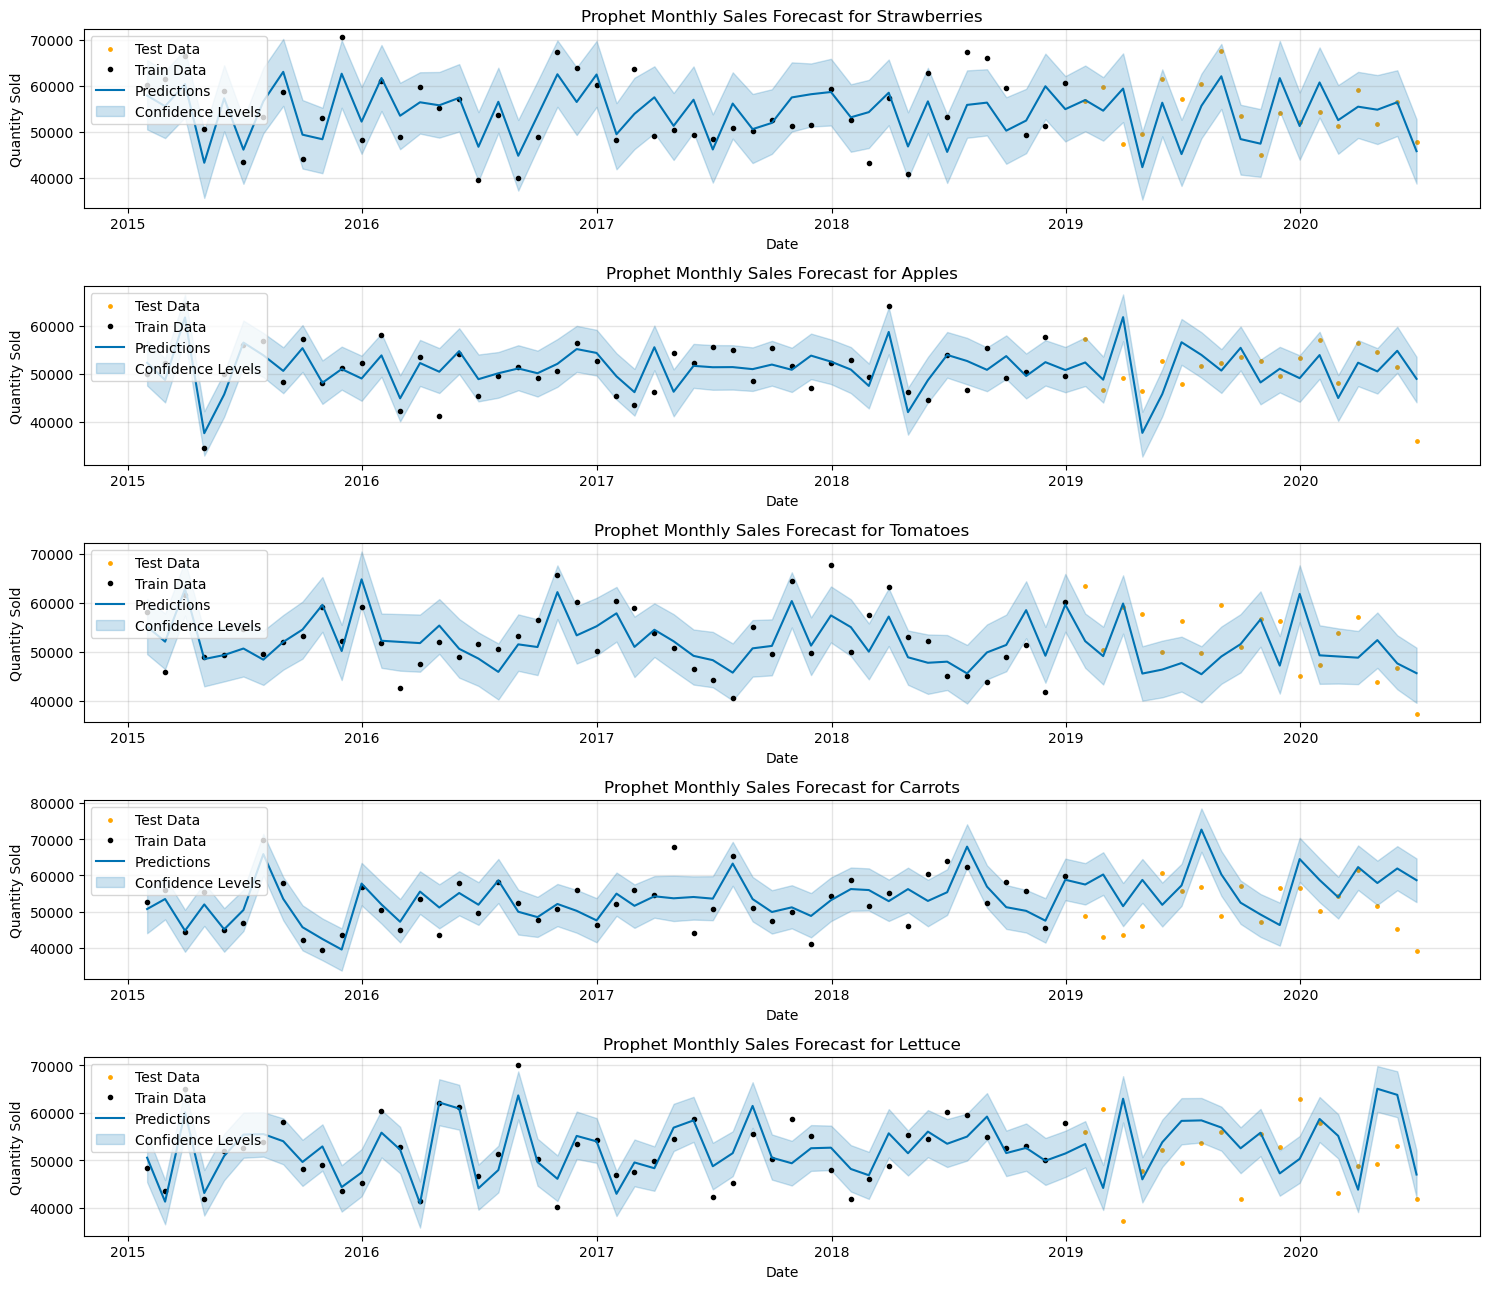

In [83]:

# Create subplots for each product
fig, axes = plt.subplots(len(products), 1, figsize=(15, 13))

if len(products) == 1:
    axes = [axes]  # Ensure axes is always a list

for i, product in enumerate(products):
    axes[i].scatter(test_data[product]['Date'],
                    test_data[product]['Quantity_Sold'],
                    color='orange',
                    s=6)
                                    
    category_plot = prophet_models[product].plot(prophet_forecasts[product],
                                                 ax=axes[i],
                                                 figsize=(15, 7))
                                     
    axes[i].set_title(f'Prophet Monthly Sales Forecast for {product}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Quantity Sold')
                                     
    axes[i].legend(['Test Data', 'Train Data', 'Predictions', 'Confidence Levels'], loc='upper left')
    
plt.tight_layout()
plt.show()

### Forecasting With RandomForestRegressor

Train And Evaluate the models

In [84]:

# Initialize variables for evaluation metrics
rf_mae, rf_rmse, rf_mape = 0, 0, 0

# Dictionaries to store models and forecasts
rf_mape_scores = dict()
rf_X_train_dates = dict()
rf_X_test_dates = dict()
rf_y_train = dict()
rf_y_test = dict()
rf_forecasts = dict()

for product in products:
    df_product = df[df['Product'] == product]
    
    df_product = pd.get_dummies(df_product, drop_first=True)
    
    df_product = df_product.set_index('Date').resample('M').sum().reset_index()
    
    df_product['Year'] = df_product['Date'].dt.year
    df_product['Month'] = df_product['Date'].dt.month
    df_product['Day'] = df_product['Date'].dt.day
    df_product['WeekOfYear'] = df_product['Date'].dt.isocalendar().week
    
    # Prepare the data
    train = df_product[df_product['Year'] < 2019].reset_index()
    test = df_product[df_product['Year'] >= 2019].reset_index()
    
    rf_X_train_dates[product] = train['Date']
    rf_X_test_dates[product] = test['Date']
    
    train = train.drop(columns=['Date'])
    test = test.drop(columns=['Date'])
    
    X_train = train.drop(columns=['Quantity_Sold', 'Revenue'])
    y_train = train['Quantity_Sold']
    
    X_test = test.drop(columns=['Quantity_Sold', 'Revenue'])
    y_test = test['Quantity_Sold']
    
    rf_y_train[product] = y_train
    rf_y_test[product] = y_test
    
    # Train the RandomForest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    forecast = model.predict(X_test)
    rf_forecasts[product] = forecast
    
    product_mae = mean_absolute_error(y_test, forecast)
    product_rmse = mean_squared_error(y_test, forecast, squared=False)
    product_mape = mean_absolute_percentage_error(y_test, forecast) * 100
    
    rf_mae += product_mae
    rf_rmse += product_rmse
    rf_mape += product_mape
    
    rf_mape_scores[product] = product_mape

# Calculate average metrics
n_products = len(products)
rf_mae /= n_products
rf_rmse /= n_products
rf_mape /= n_products

print('Random Forest MAE:', rf_mae)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest MAPE:', rf_mape)


Random Forest MAE: 2661.934684588824
Random Forest RMSE: 3177.6926944638376
Random Forest MAPE: 5.203538526320775


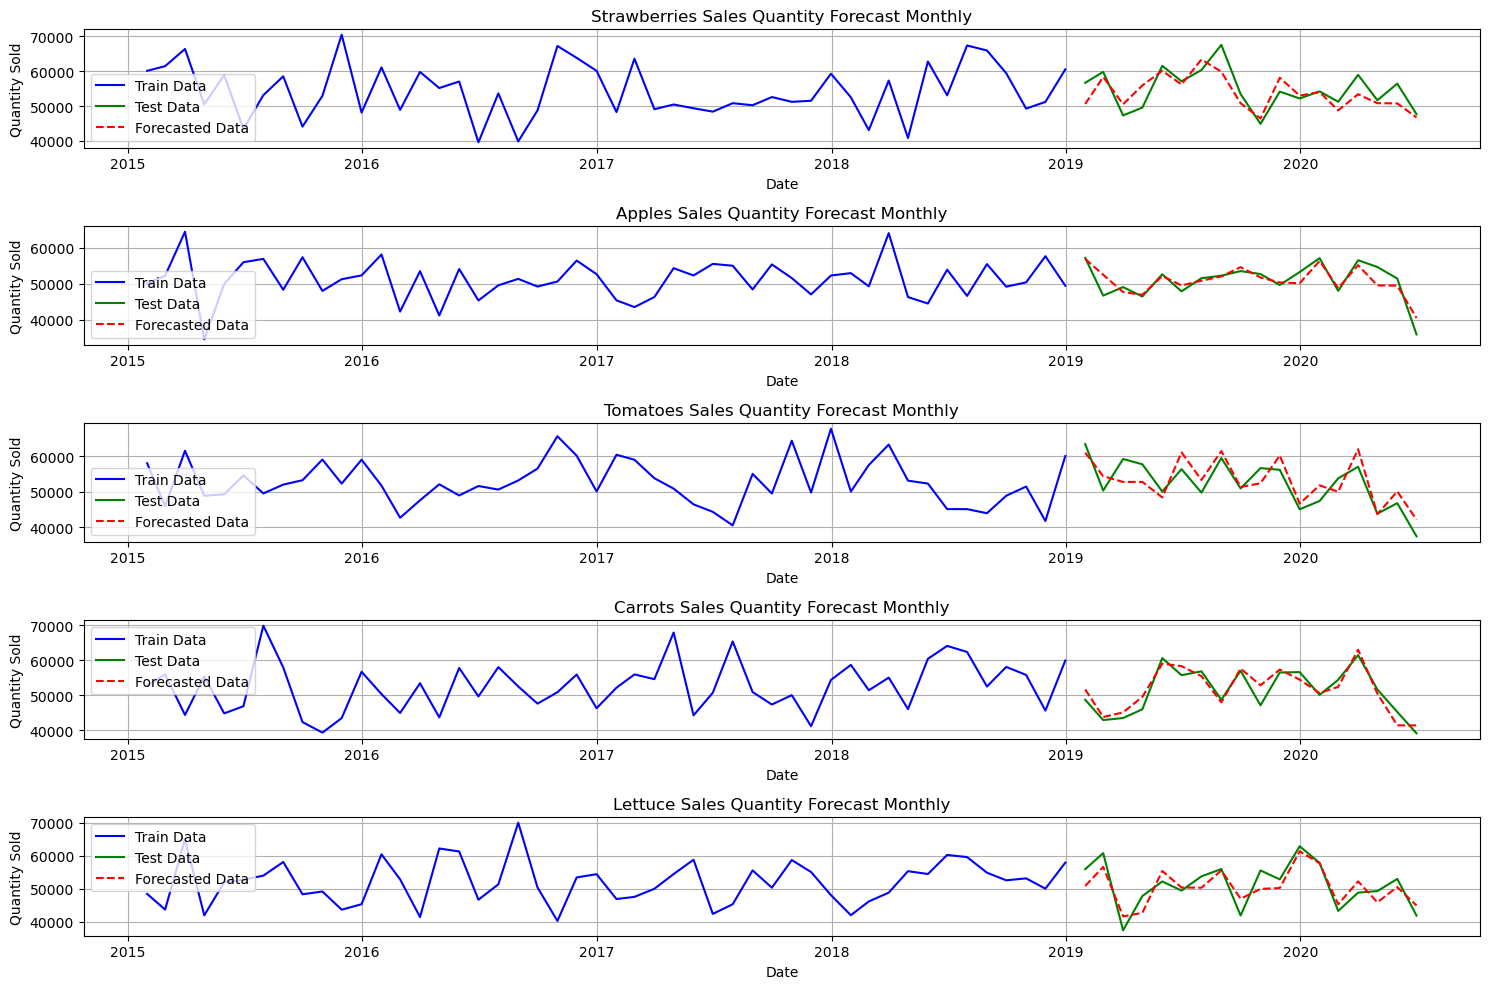

In [85]:

plt.figure(figsize=(15, 10))

for i, product in enumerate(products):
    plt.subplot(n_products, 1, i + 1)
    
    if product in rf_X_train_dates and product in rf_y_train:
        # Plot actual vs forecast
        plt.plot(rf_X_train_dates[product], rf_y_train[product], color='blue', label='Actual Quantity Sold (Train Data)')
        plt.plot(rf_X_test_dates[product], rf_y_test[product], color='green', label='Actual Quantity Sold (Test Data)')
        plt.plot(rf_X_test_dates[product], rf_forecasts[product], color='red', linestyle='dashed', label='Forecasted Quantity Sold')
    
        plt.title(f'{product} Sales Quantity Forecast Monthly')
        plt.xlabel('Date')
        plt.ylabel('Quantity Sold')
        plt.legend(['Train Data', 'Test Data', 'Forecasted Data'])
        plt.grid(True)
    else:
        print(f"Data for '{product}' not found in rf_X_train_dates or rf_y_train.")
        
plt.tight_layout()
plt.show()

## Conclusion

In [86]:
arima_mape_scores['--Average--'] = np.mean([v for k, v in arima_mape_scores.items()])
prophet_mape_scores['--Average--'] = np.mean([v for k,v in prophet_mape_scores.items()])
rf_mape_scores['--Average--'] = np.mean([v for k, v in rf_mape_scores.items()])


pd.DataFrame({'ARIMA':arima_mape_scores,
             'Prophet': prophet_mape_scores,
             'RandomForestRegressor': rf_mape_scores})

ARIMA    Prophet  RandomForestRegressor
Strawberries   8.252509   8.665478               5.482484
Apples         7.672138  10.521305               3.627103
Tomatoes      11.009154  12.012712               6.526076
Carrots       11.643805  18.719716               4.069554
Lettuce       11.280264  16.485064               6.312475
--Average--    9.971574  13.280855               5.203539


#### Findings

1. Demand Patterns:

- Seasonality significantly influences demand, with certain months showing peaks.

2. Key Influencers:

- Weather conditions, particularly temperature and rainfall, have a strong correlation with demand.

3. Product Variability:

- Different products exhibit varied demand patterns and seasonal peaks.

##### Recommendations

1. Adjust Harvest Schedules:

- Use demand forecasts to adjust harvest schedules, ensuring alignment with market demand.

2. Diversify Product Offering:

- Consider diversifying the product range to stabilize revenue throughout the year.

3. Enhance Data Collection:

- Improve data collection methods for more accurate and comprehensive forecasting.

4. Leverage the Best Performing Model:

- The RandomForestRegressor consistently outperformed ARIMA and Prophet across all products. Thus, it is recommended to primarily use the RandomForestRegressor for demand forecasting.
5. Tailor Strategies to Product-Specific Insights:

- Strawberries:

- - With the lowest error rate, focus on refining the model to maintain accuracy.

- - Implement strategies to optimize strawberry production based on accurate forecasts.

- Apples:

- - Continue using RandomForestRegressor due to its high accuracy.

- - Consider exploring additional features to improve the model further.

- Tomatoes, Carrots, and Lettuce:

- - Despite higher error rates compared to strawberries and apples, the RandomForestRegressor still outperforms other models.

- - Focus on data quality and potentially additional features specific to these crops to reduce errors.

6. Model Improvement and Maintenance:

- Regularly monitor the performance of the RandomForestRegressor to ensure its predictive accuracy remains high.

- Periodically retrain the model with new data to adapt to changing market conditions and trends.

7. Data Collection Enhancements:

- Improve the quality and granularity of data collected, particularly for products with higher prediction errors, to enhance model accuracy.

- Consider additional data points such as soil conditions, pest infestations, and more detailed weather patterns.


#### Future Work

1. Incorporate More Variables:

- Include additional factors like market trends and competitor data for more robust forecasting.

2. Continuous Model Improvement:

- Regularly update and refine models to adapt to changing market conditions.

3. Real-time Forecasting:

- Implement real-time data processing and forecasting to enable more responsive decision-making.
 